# Случайные леса (Random Forest) - Регрессия
## Сравнительный анализ различных методов регрессии
---
## Данные

Буровая компания применяет рентгеновские лучи для определения плотности камня. **Задача - построить модель, которая по входному сигналу будет выдавать оценку плотности скальной породы, чтобы вовремя менять буровые головки прежде, чем переходить к бурению камня.**

Данные - результаты лабораторных тестов - в них измеряется отражённый сигнал, полученный сенсорами на разных частотах в герцах, для различной плотности камня. Оказалось, что если отобразить эти результаты на графике, то получится синусоида - с изменением плотности камня уровень отражённого сигнала меняется волнообразно.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../DATA/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [8]:
df.columns = ['Signal','Density']

## Визуализация

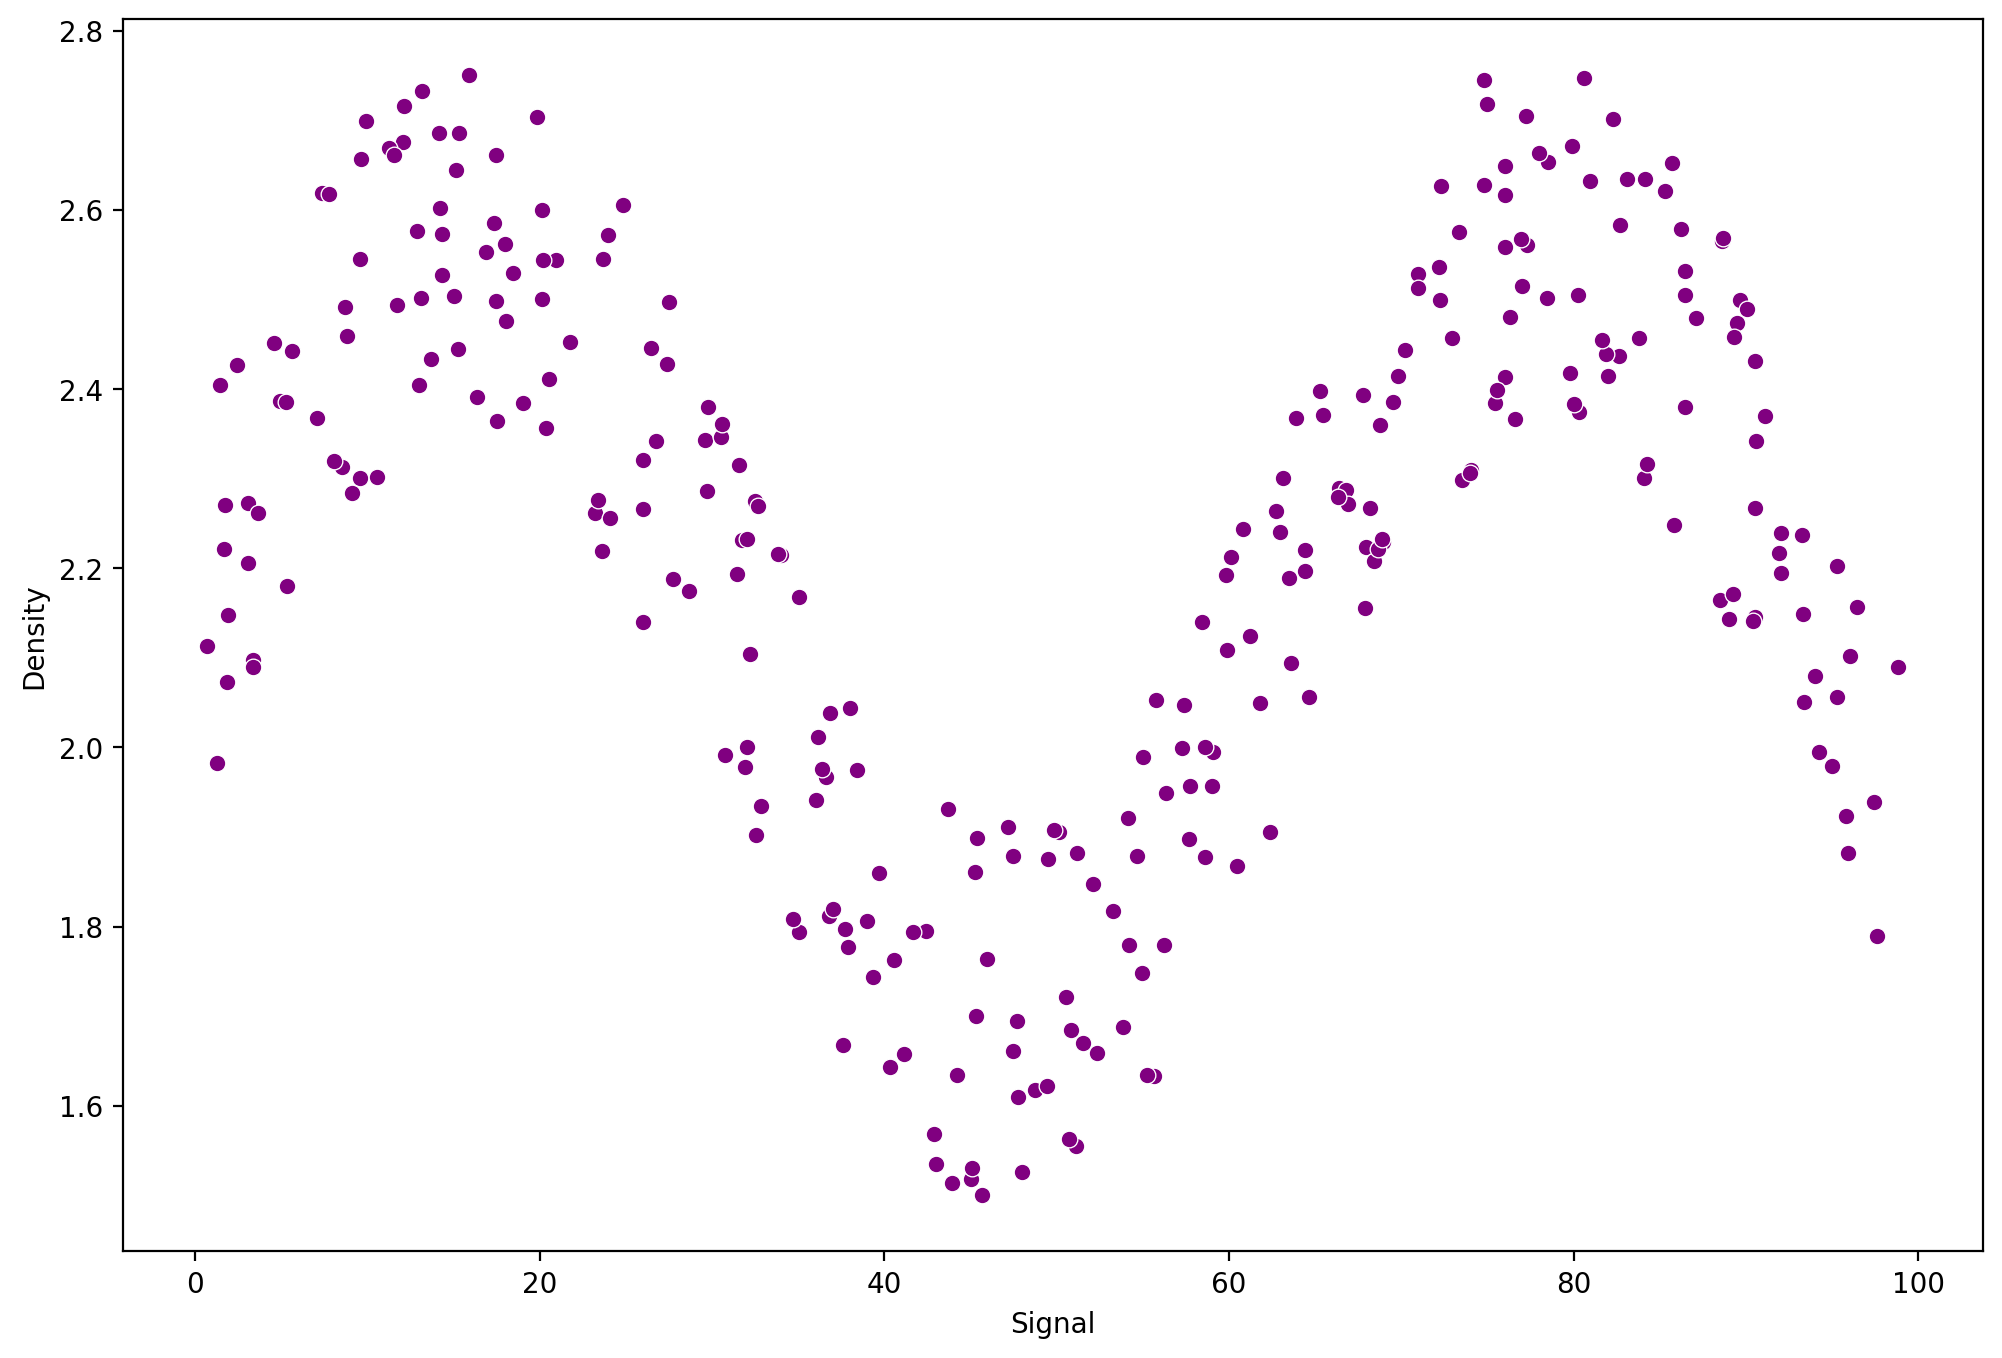

In [10]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='Signal', y='Density', color='purple')
plt.show()

## Разбиение данных на обучающий и тестовый наборы

Масштабирование признаков можно не выполнять, так как он у нас всего один. Чтобы привести его к нужному формату - воспользуемся `.values.reshape(-1, 1)` - это нужно потому что наш один признак является не датафреймом, а объектом *Series*. Чтобы подать эти данные на вход модели машинного обучения - их надо преобразовать в двумерный массив.   

Это можно сделать двумя способами, например для объекта *Series*[10, 20,3 0]:
1) Можно сказать, что это будет **одна колонка и три строки** - для этого надо воспользоваться `.values.reshape(-1, 1)` - т.е. **у нас один признак и три строки с данными**
2) Можно сказать, что это будет **одна строка и три колонки** - для этого надо воспользоваться `.values.reshape(1, -1)` - т.е. **у нас три признака и одна строка с данными**

Таким образом объект *Series* преобразуется в двумерный массив.

In [15]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

---
---
# Линейная регрессия

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
lr_model = LinearRegression()

In [27]:
lr_model.fit(X_train, y_train)

LinearRegression()

## Оценка работы модели

In [30]:
lr_preds = lr_model.predict(X_test)

In [32]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

Здесь, по стуи, получилась практически горизонтальная линия, которая проходит параллельно оси x.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [37]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

Здесь может показаться, что отклонение в 0.2 - это неплохой результат.

In [39]:
mean_squared_error(y_test, lr_preds)

0.0660516726514864

In [41]:
root_mean_squared_error(y_test, lr_preds)

0.2570051996584629

Может сложиться впечатление, что в целом модель работает неплохо.

## Визуализируем результаты работы модели

In [48]:
signal_range = np.arange(0, 100)

In [50]:
# Здесь также нужно привести данные к форме двумерного массива
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

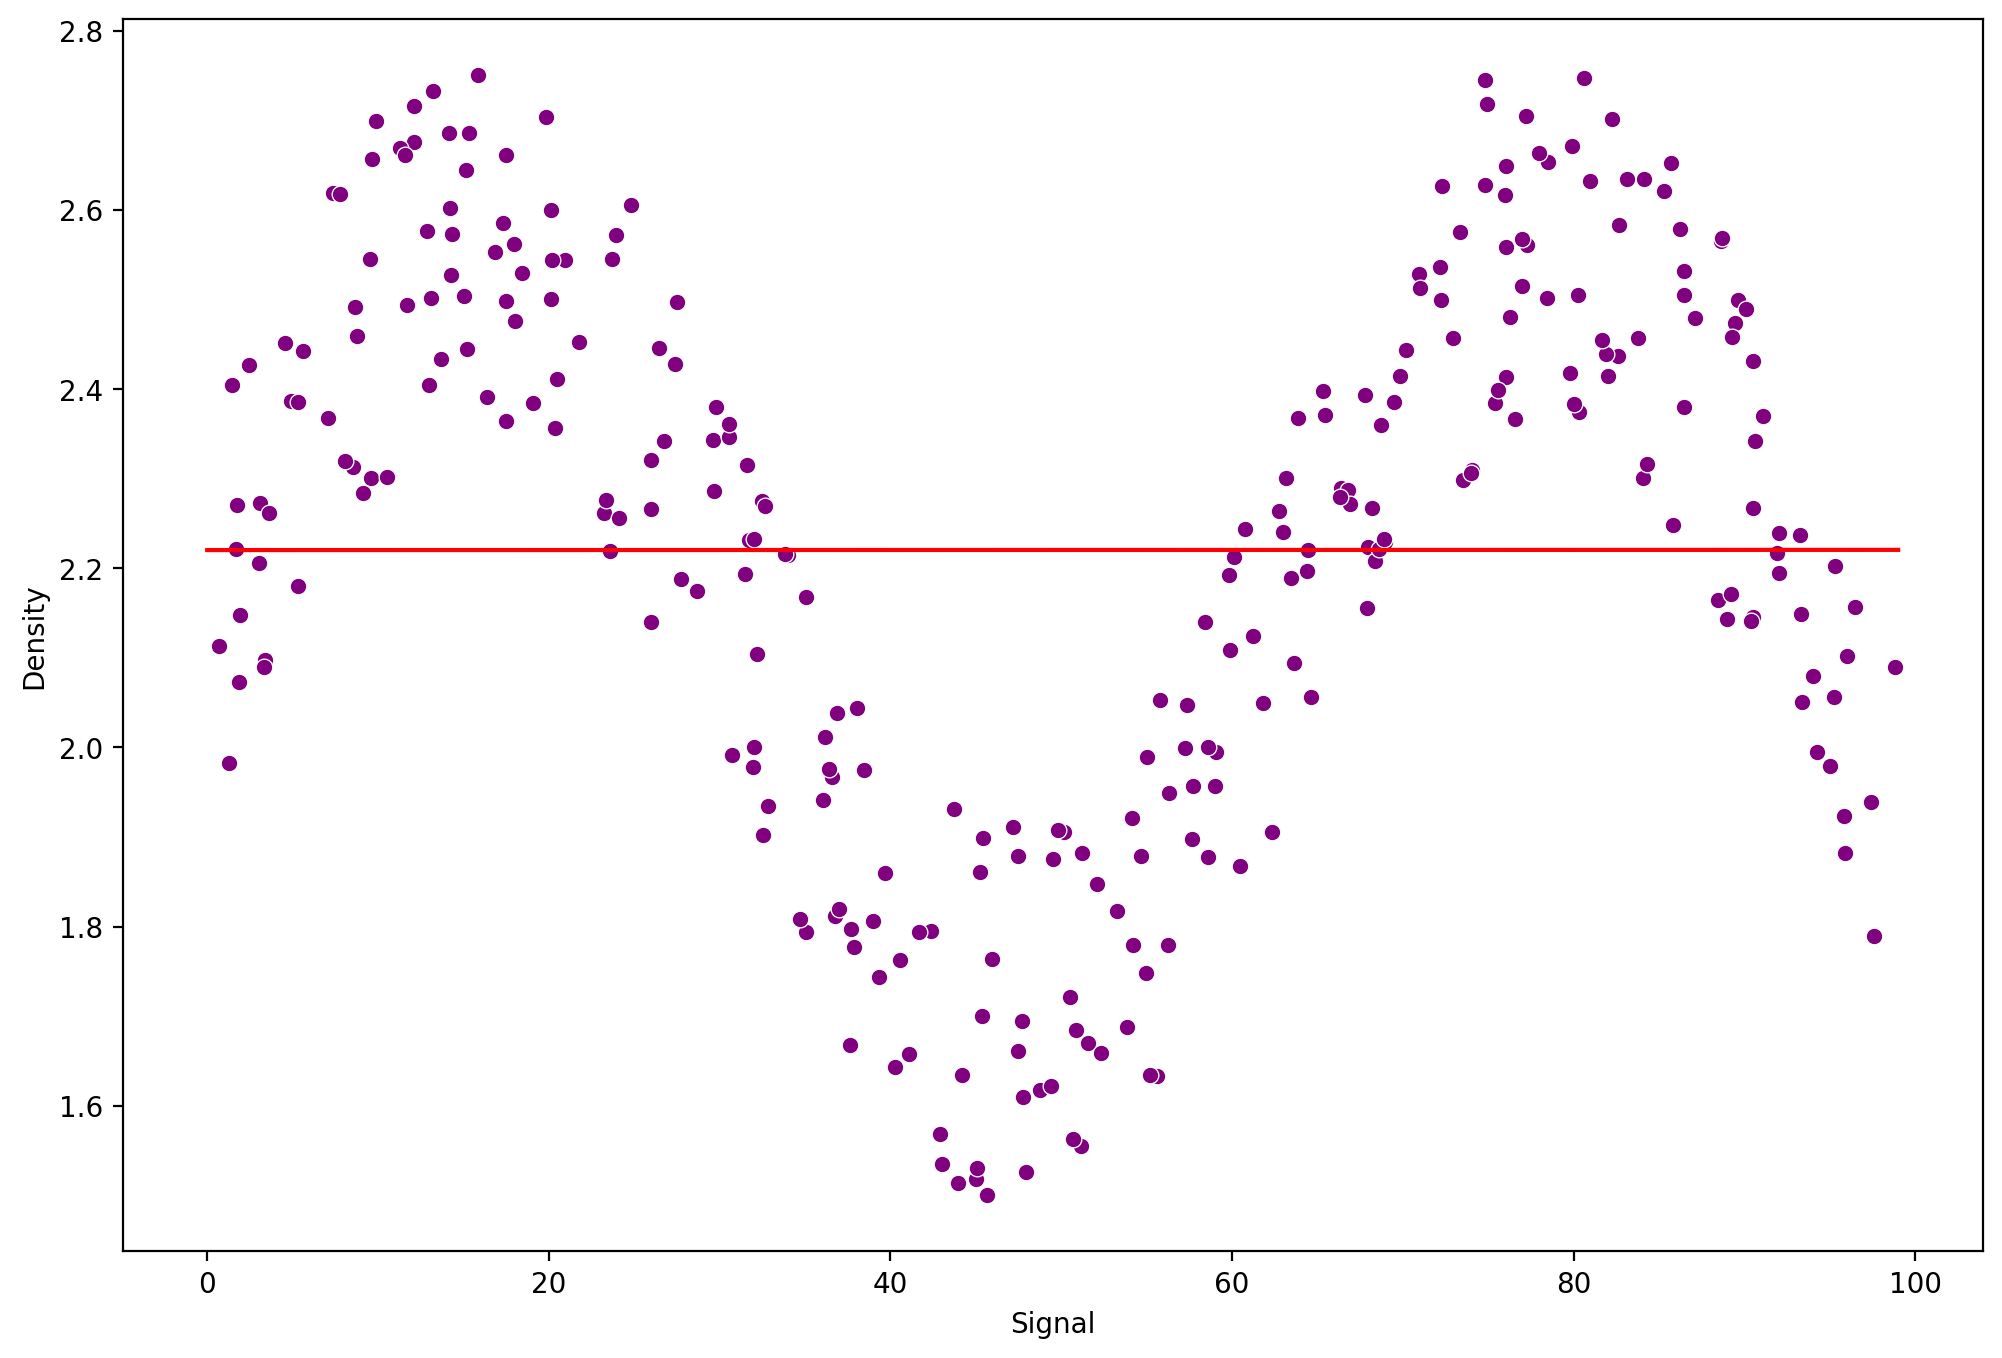

In [52]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='Signal', y='Density', color='purple')
plt.plot(signal_range, signal_preds, color='red')
plt.show()

Мы получили прямую линию, которая пытается пройти как можно ближе к точкам. Но получается, что линейная модель не может пройти через все эти точки. Хотя полученные метрики указывали на приемлемый результат.

**Как это можно было бы понять в случае нескольких признаков, когда нет возможности нарисовать такой график?**

Прежде всего, если посмотреть на lr_preds, то можно увидить практически одинаковые значения на выходе - это уже является сигналом того, что с моделью что-то не так, потому что у y_test более разнообразные значения.  
Также, для линейной модели, в случае нескольких признаков, можно построить график остатков. С его помощью можно понять, насколько линейная модель является удачной или не удачной в данной конкретной задаче.

In [55]:
test_residuals = y_test - lr_preds
test_residuals

176   -0.040521
250    0.400760
12     0.011315
16     0.100494
258   -0.312308
281   -0.430969
226    0.043560
284   -0.072020
147    0.276388
228    0.221894
235   -0.323090
123   -0.297062
221    0.046274
270   -0.027629
78     0.194580
89     0.440978
4      0.232041
143    0.436184
19     0.122822
259    0.140217
200    0.040921
41    -0.181489
208    0.323389
15     0.325185
153    0.080322
285    0.139479
169   -0.221227
265   -0.561795
13     0.211214
212    0.079845
Name: Density, dtype: float64

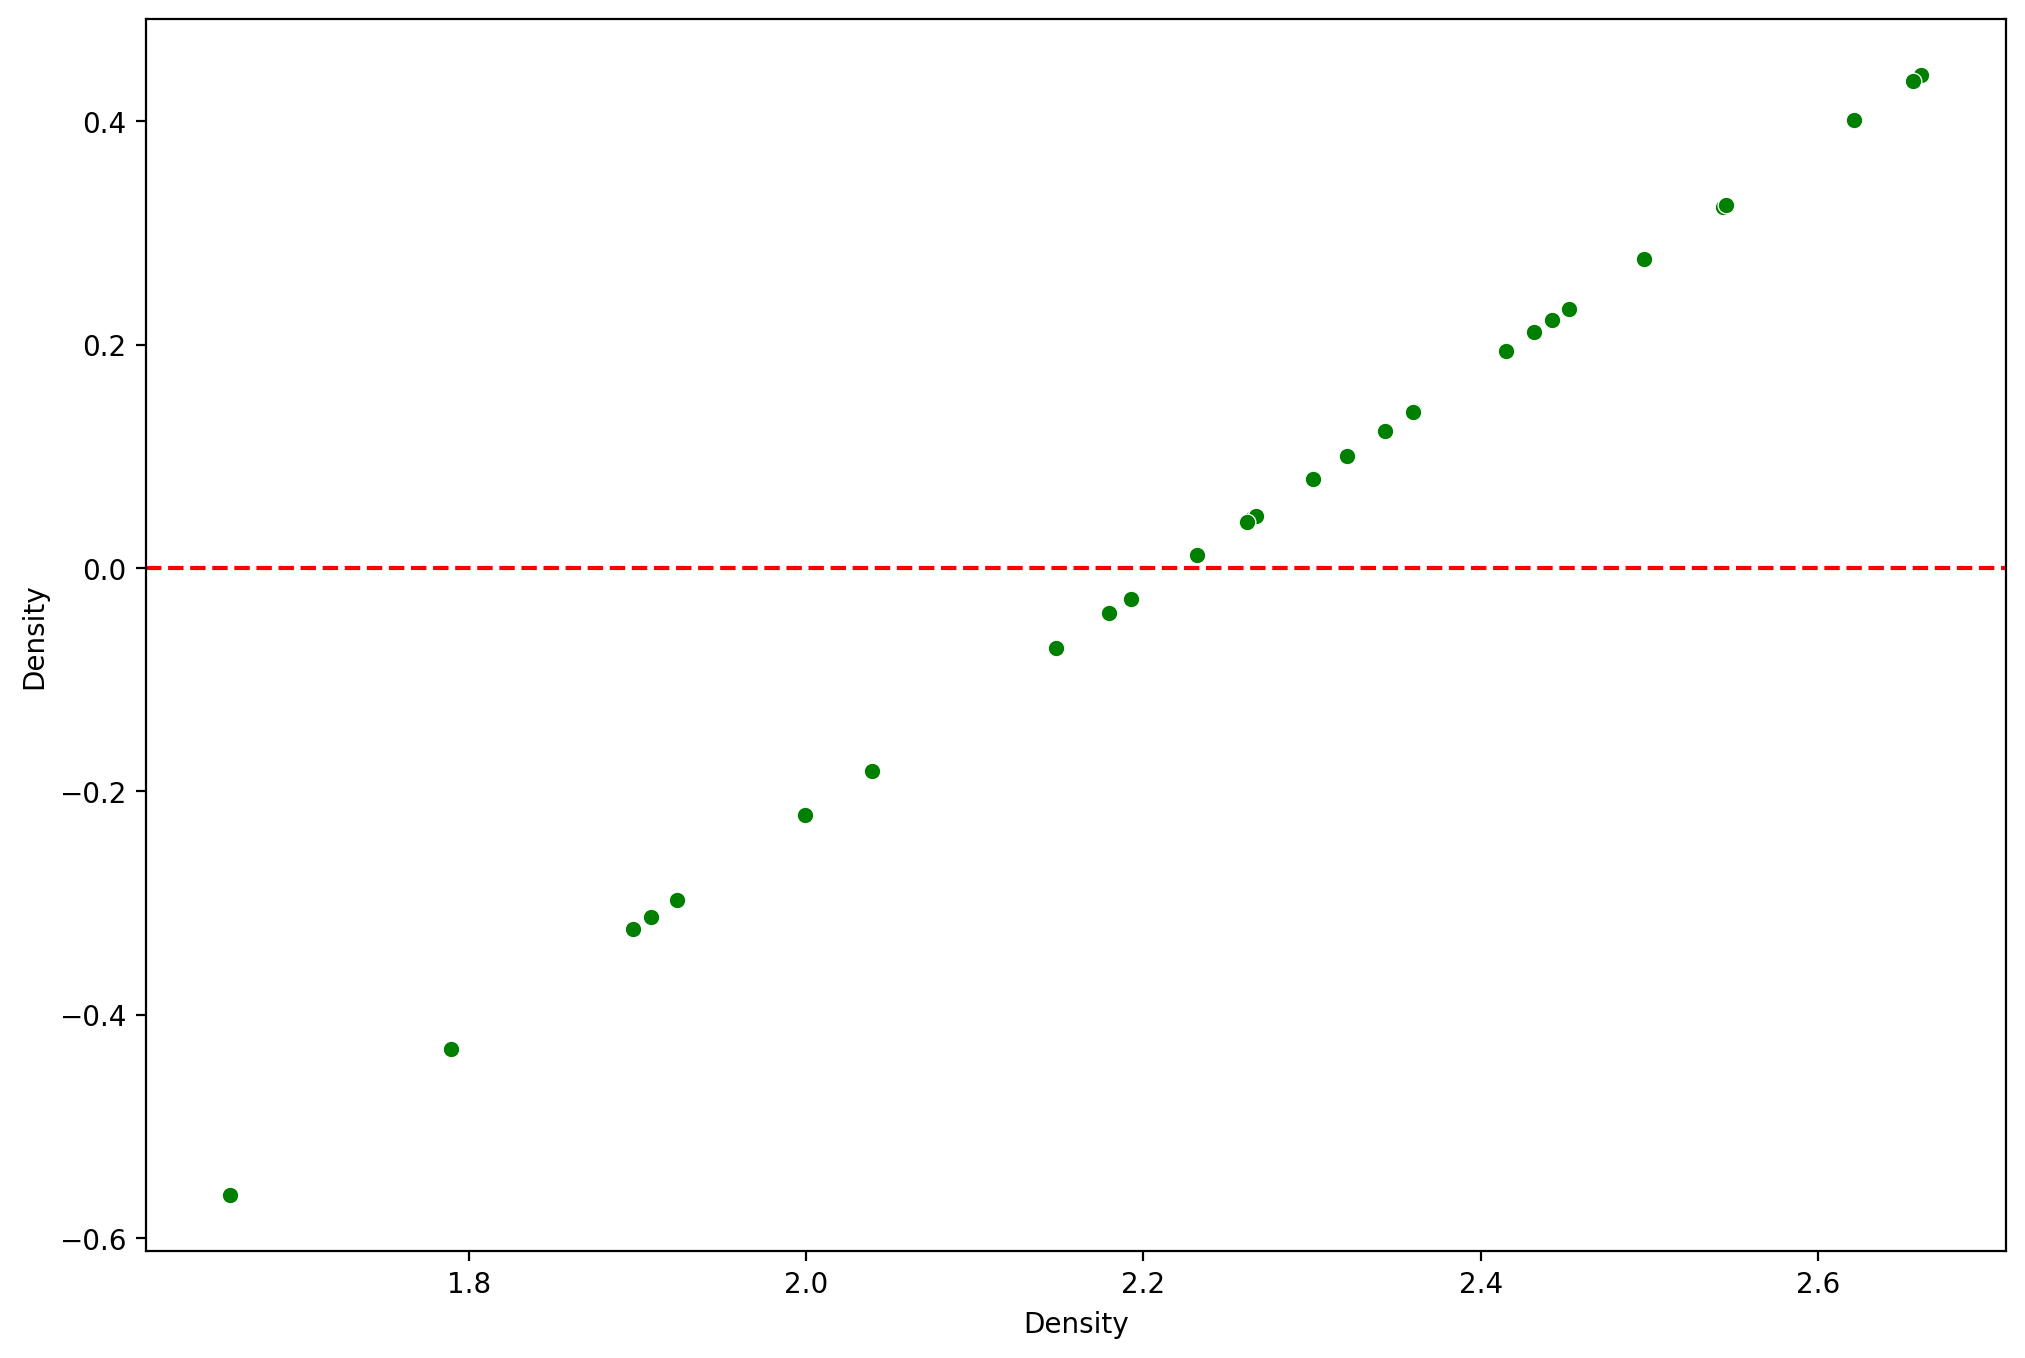

In [57]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x=y_test, y=test_residuals, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

---
---
# Полиномиальная регрессия

## Попытка применить модель полиномиальной регрессии
Посмотрим, почему стандартный подход полиномиальной модели здесь будет затруднителен. **Важно: здесь нам ещё повезло - мы можем легко визуализировать результаты по осям y и x.**

### Вспомогательная функция для запуска моделей

In [64]:
def run_model(model, X_train, y_train, X_test, y_test):
    """
    Вспомогательная функция для запуска моделей, причём
    это могут быть не только модели регрессии, но и другие модели.
    """
    
    # Обучение модели
    model.fit(X_train, y_train)
    
    # Вычисление метрик
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # Визуализация результатов модели
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))

    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(data=df, x='Signal', y='Density', color='black')
    plt.plot(signal_range, signal_preds, color='blue')
    plt.show()

MAE: 0.211198973318633
RMSE: 0.2570051996584629


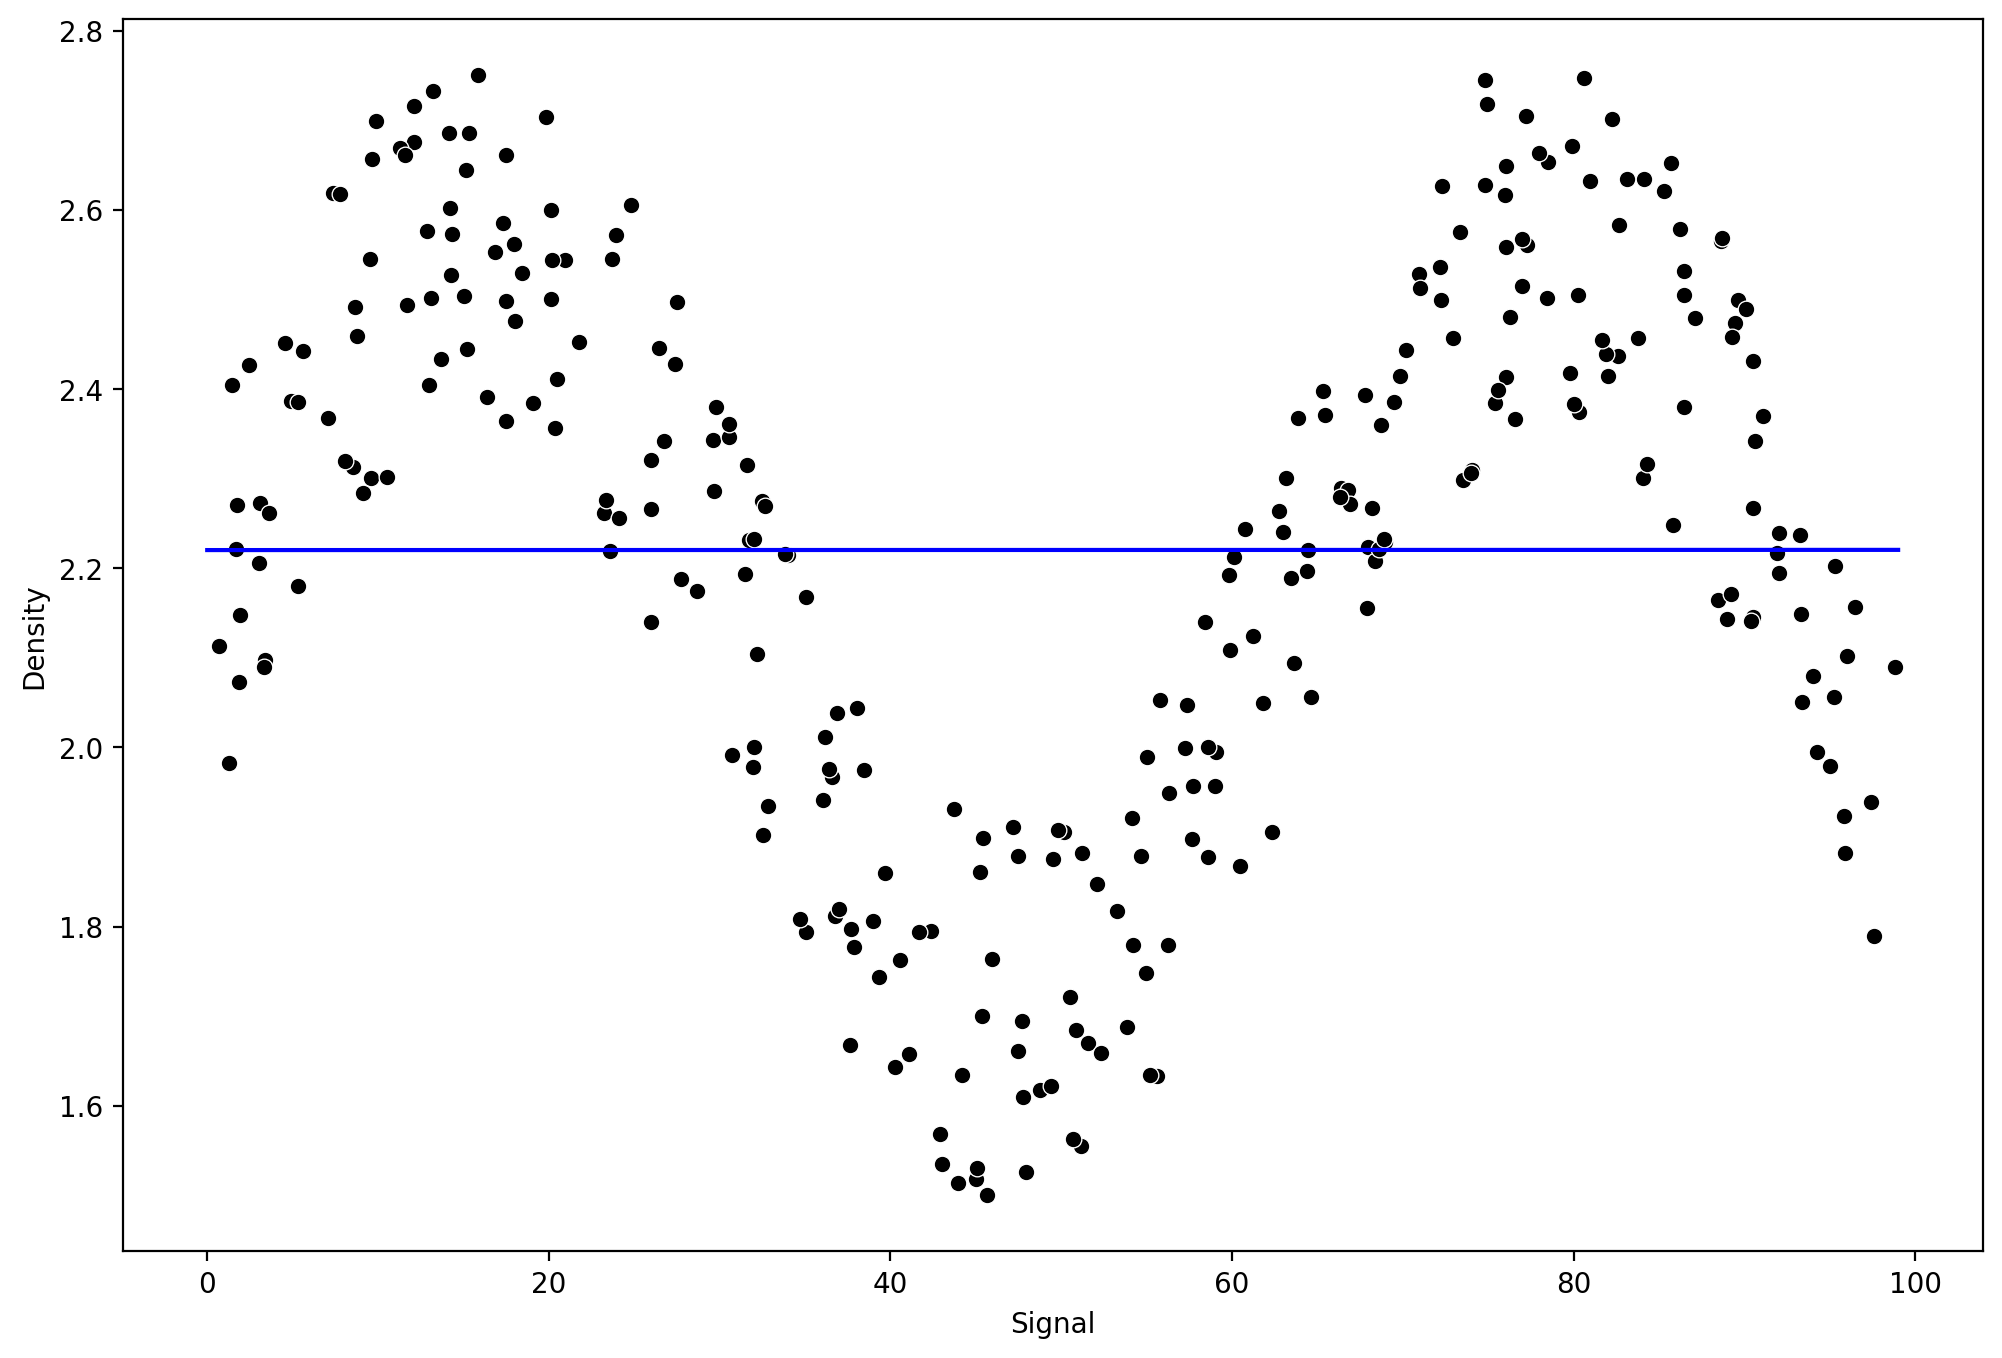

In [66]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

## Пайплайн для степеней полинома

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

MAE: 0.2290310544351129
RMSE: 0.28173095637255835


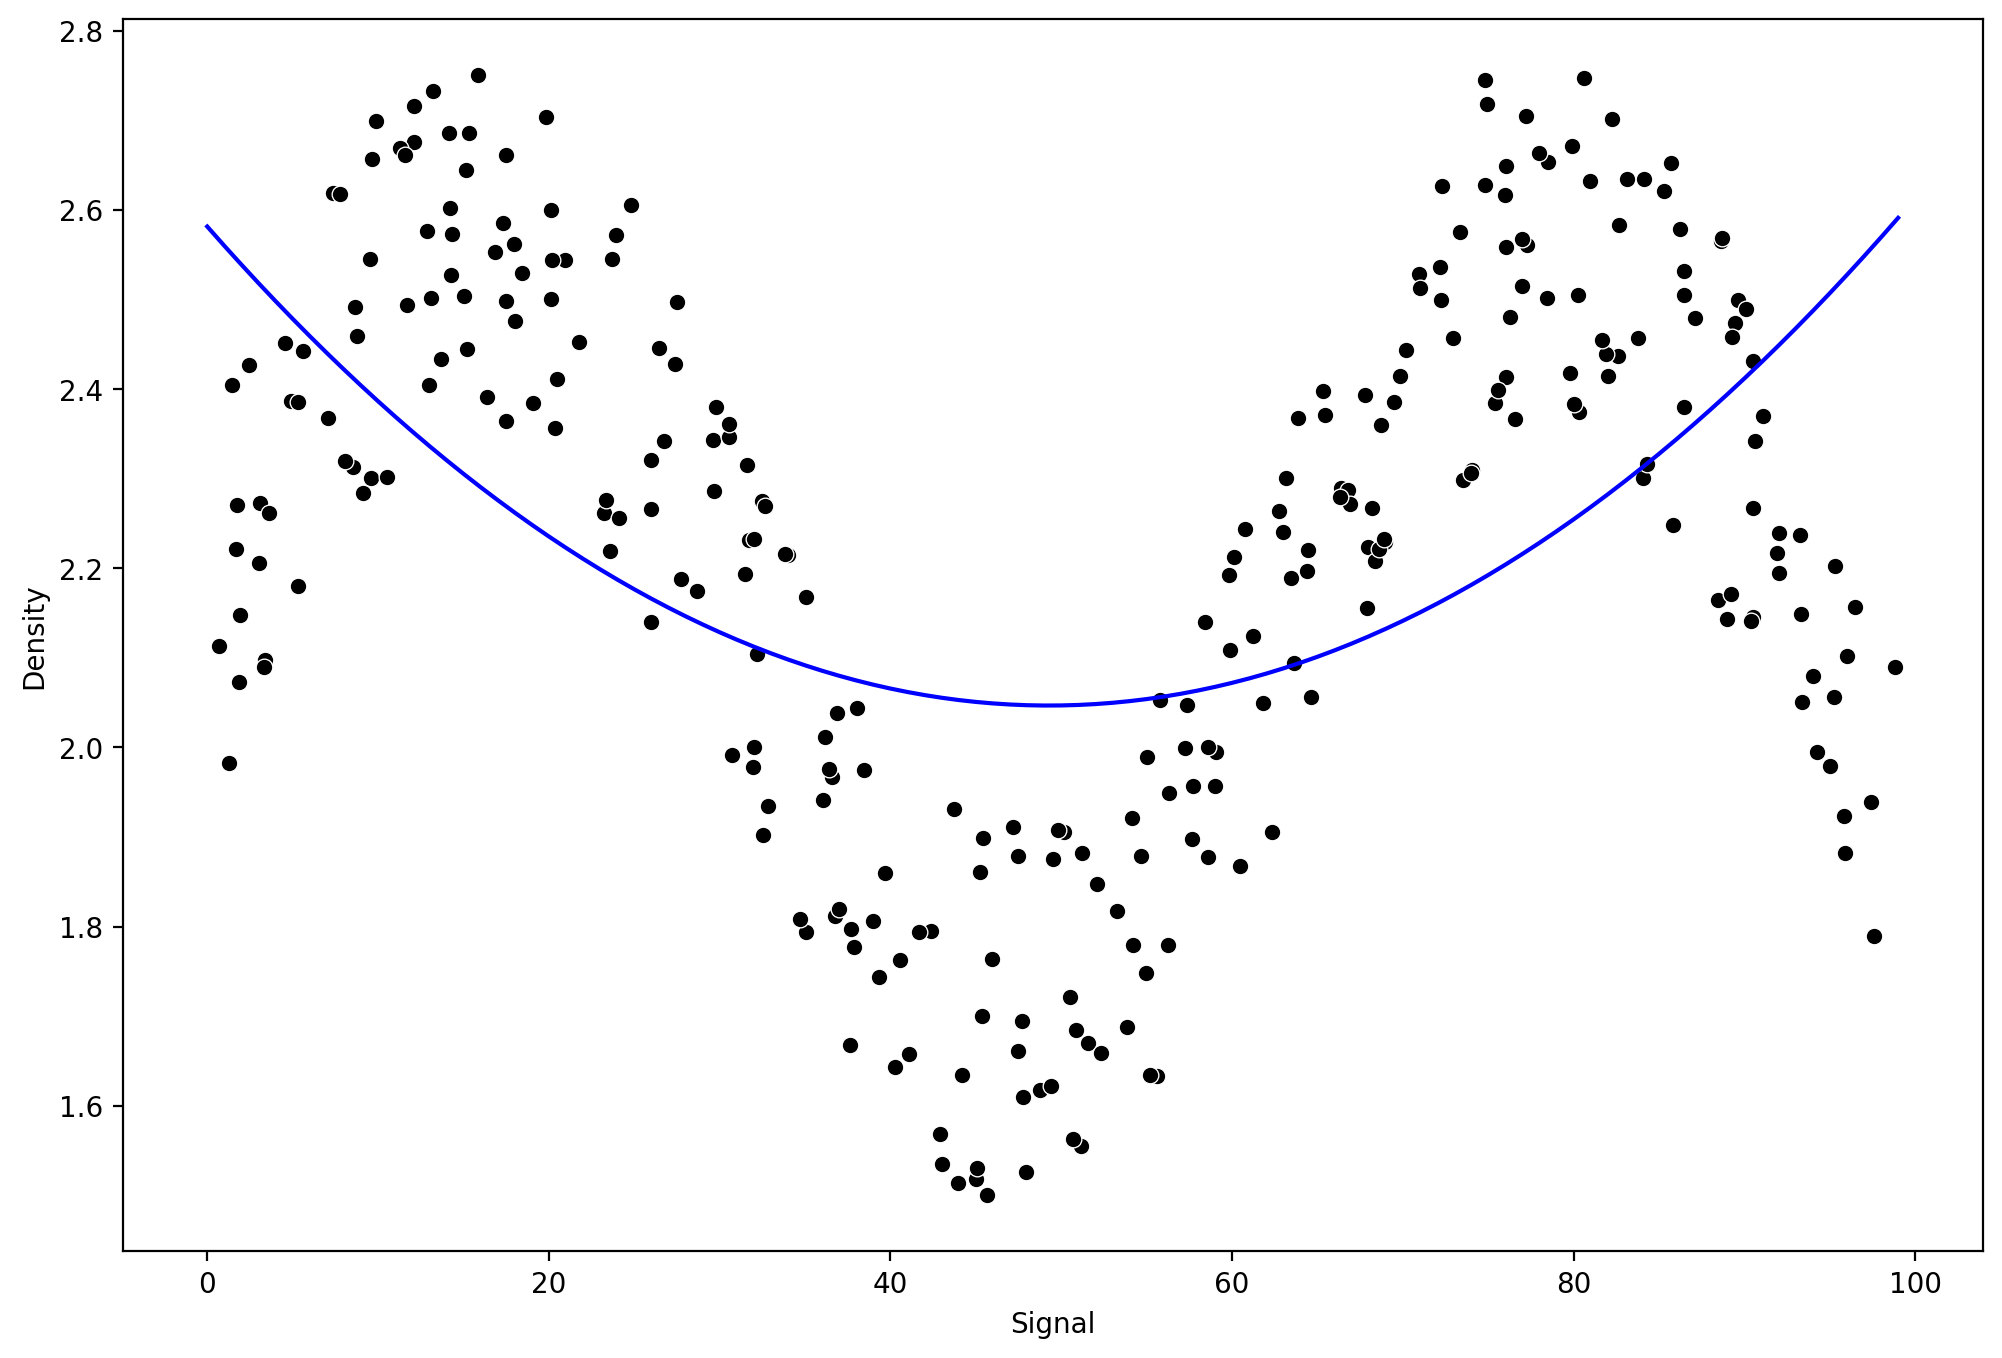

In [72]:
# Мы получим объект pipe, который будет выглядеть
# как модель и иметь методы .fit() и .predict()
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

## Сравнение различных степеней полинома

MAE: 0.14338577193757898
RMSE: 0.16269005292763578


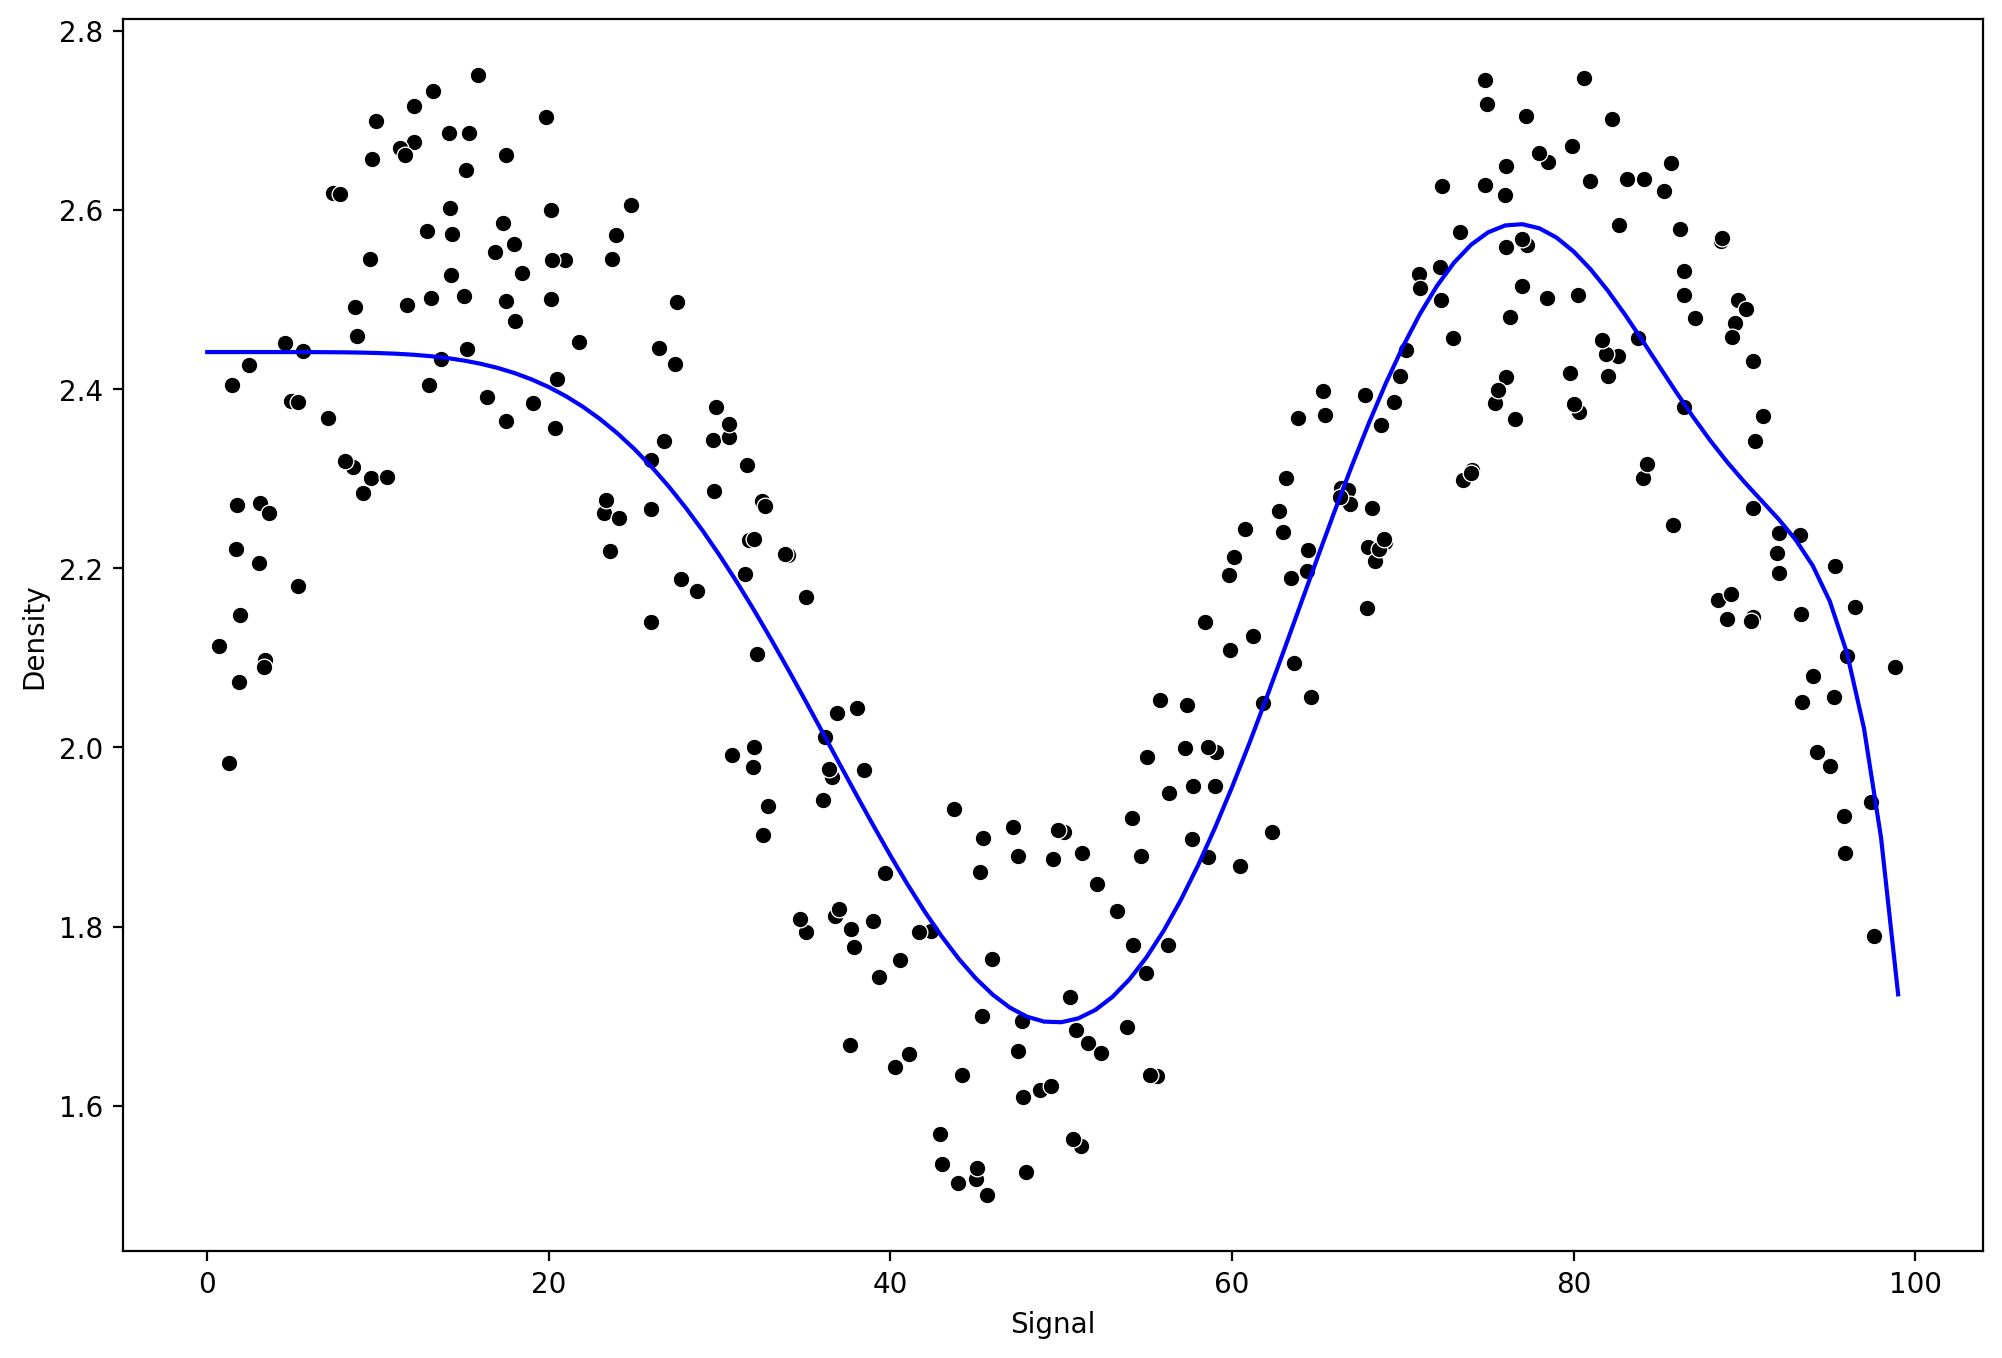

In [77]:
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

Значения метрик в данном случае уменьшились в два раза, график получился в целом неплохим. Однако, здесь, при увеличении степени полинома - можно слишком сильно отклониться в сторону переобученности модели, т.е. когда модель слишком хорошо повторяет все шумы в данных. 

Возможно, что какое-то меньшее значение полинома позволит соблюсти баланс между смещением и дисперсией. При выборе полинома можно нарисовать график ошибок и выяснить, что в какой-то момент следует остановиться и перестать увеличивать степень полинома.

In [83]:
RMSE_list = []
MAE_list = []

for i in range(1, 10):

    # Создаем и обучаем модель
    model = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    model.fit(X_train, y_train)

    # Вычисляем метрики модели
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)

    # Добавляем полученные ошибки в список
    MAE_list.append(mae)
    RMSE_list.append(rmse)

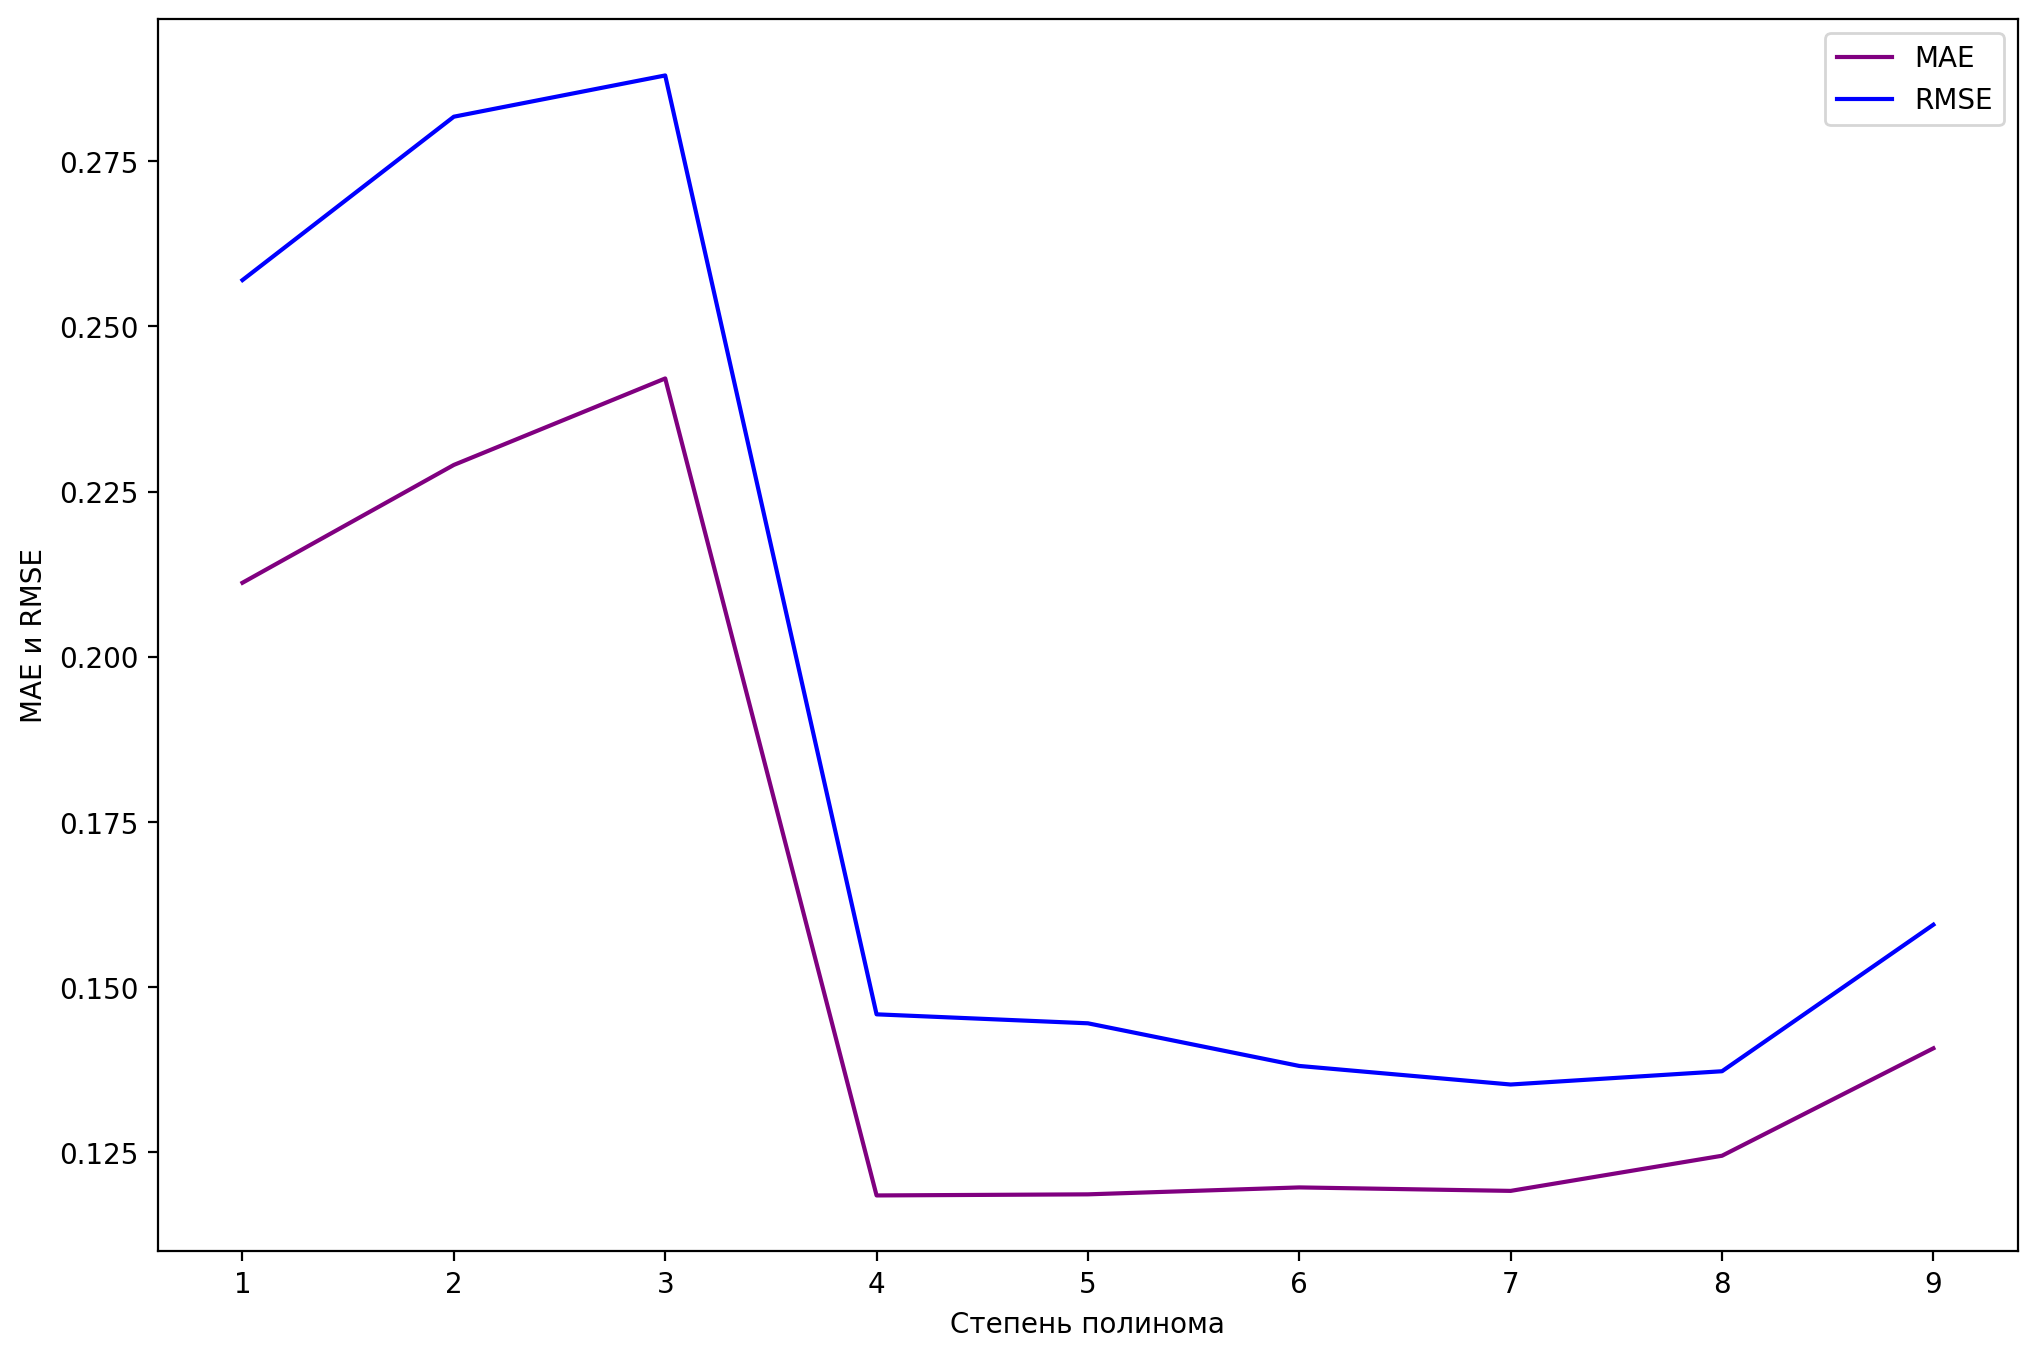

In [85]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(1, 10), MAE_list, label='MAE', color='purple')
plt.plot(range(1, 10), RMSE_list, label='RMSE', color='blue')
plt.xlabel('Степень полинома')
plt.ylabel('MAE и RMSE')
plt.legend()
plt.show()

Судя по полученным графикам, лучше взять полином 4 степени, т.к. модель будет значительно проще и далее ошибка падает незначительно, а с возрастанием степени полинома есть шанс переобучить модель и модель становится сложнее.

MAE: 0.1184764278190075
RMSE: 0.14588633387775765


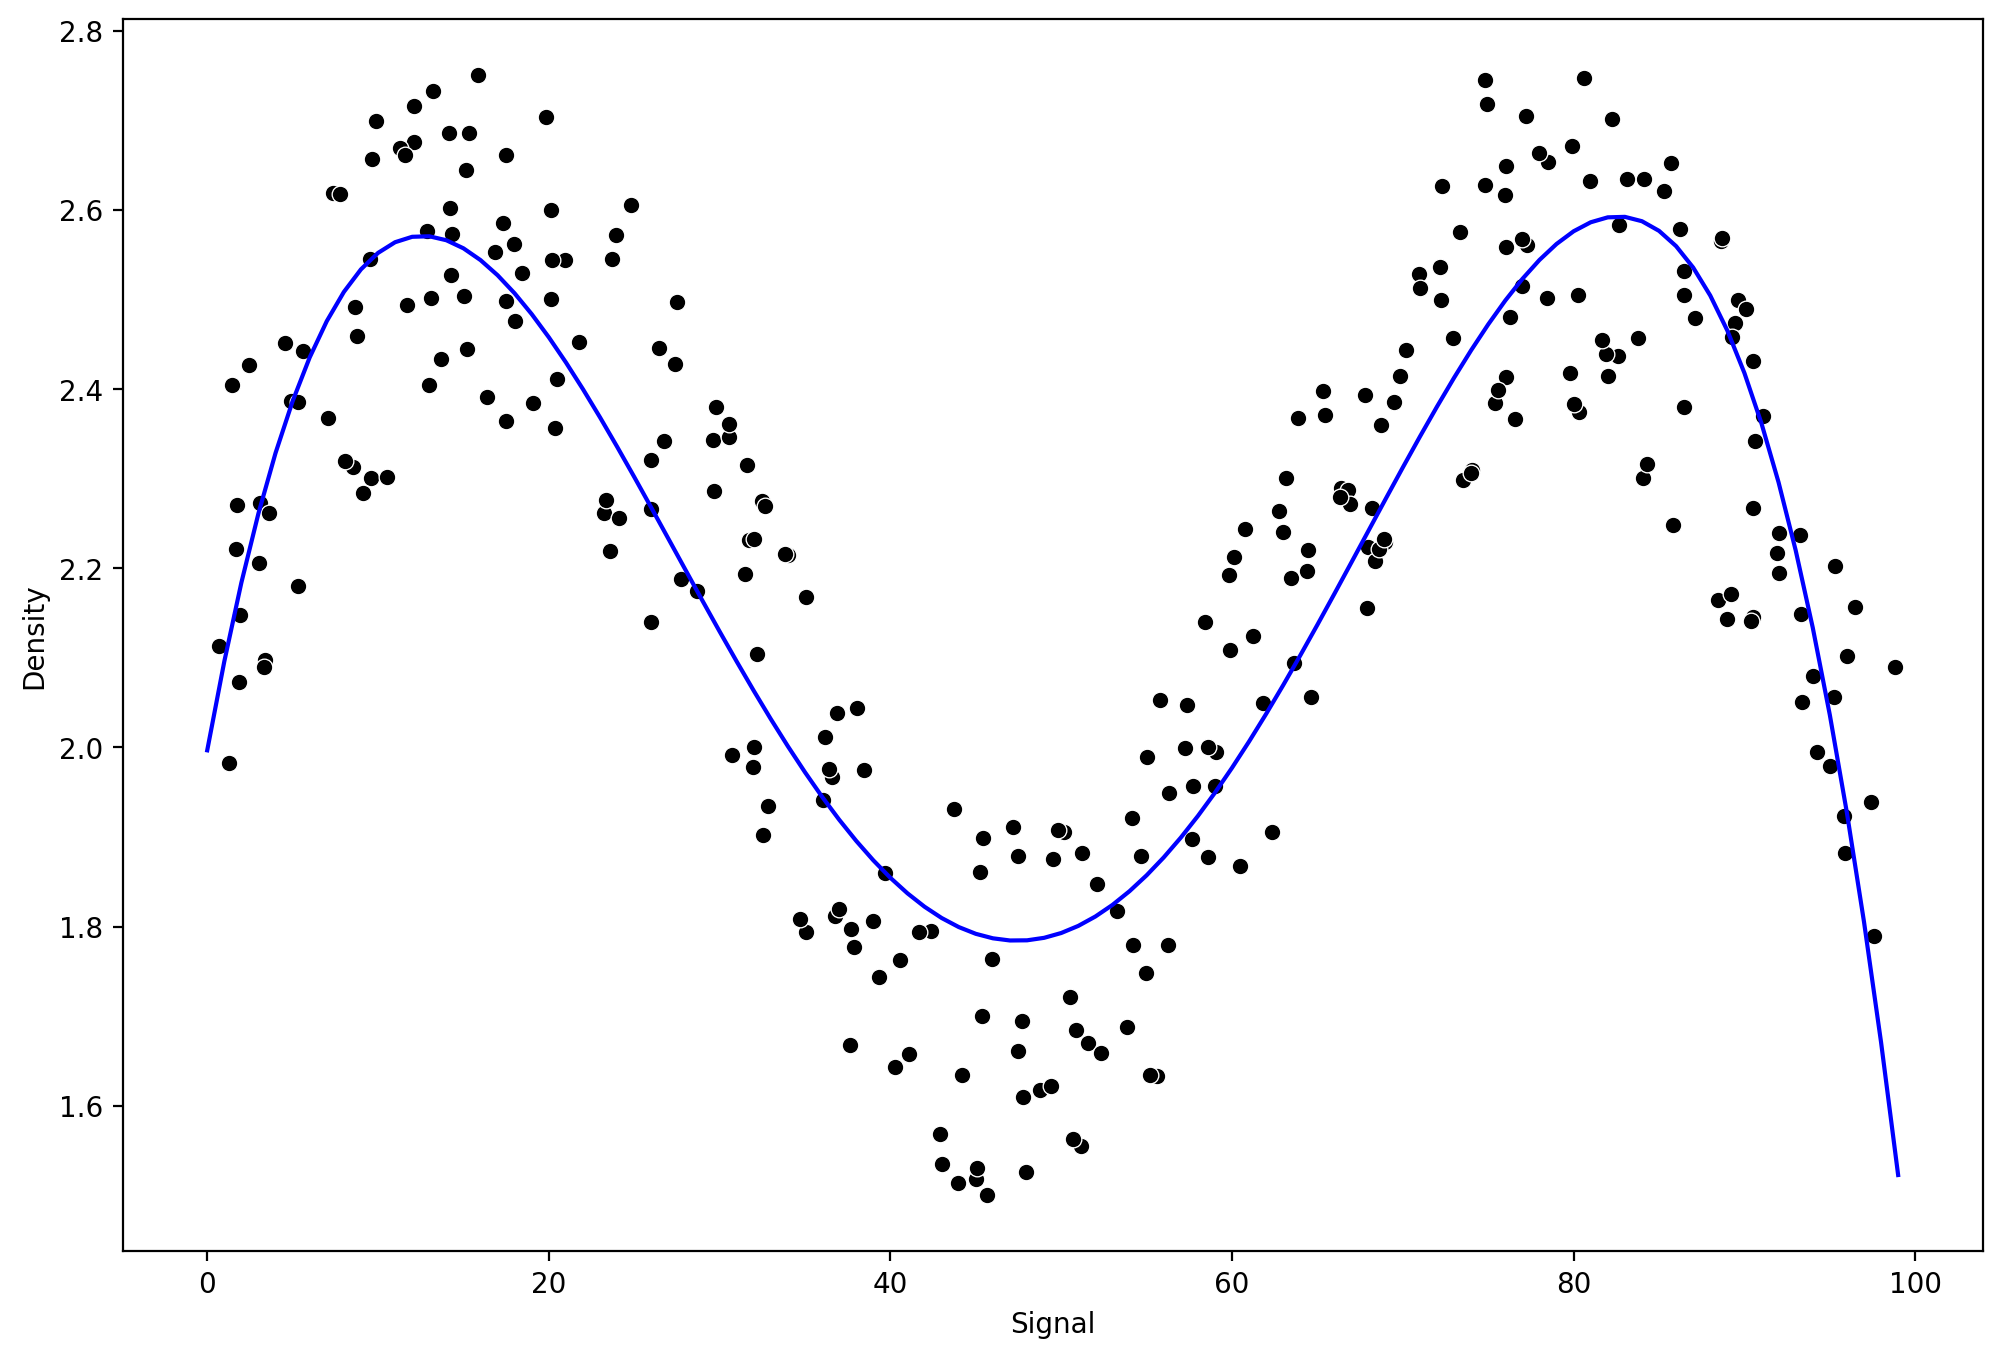

In [87]:
pipe = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

Если мы уверены в том, что на входе в модель будут подаваться значения в диапазоне от 0 до 100, то в принципе полином 4 степени может дать хорошие результаты.

---
---
# Регрессия с помощью метода KNN

In [92]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


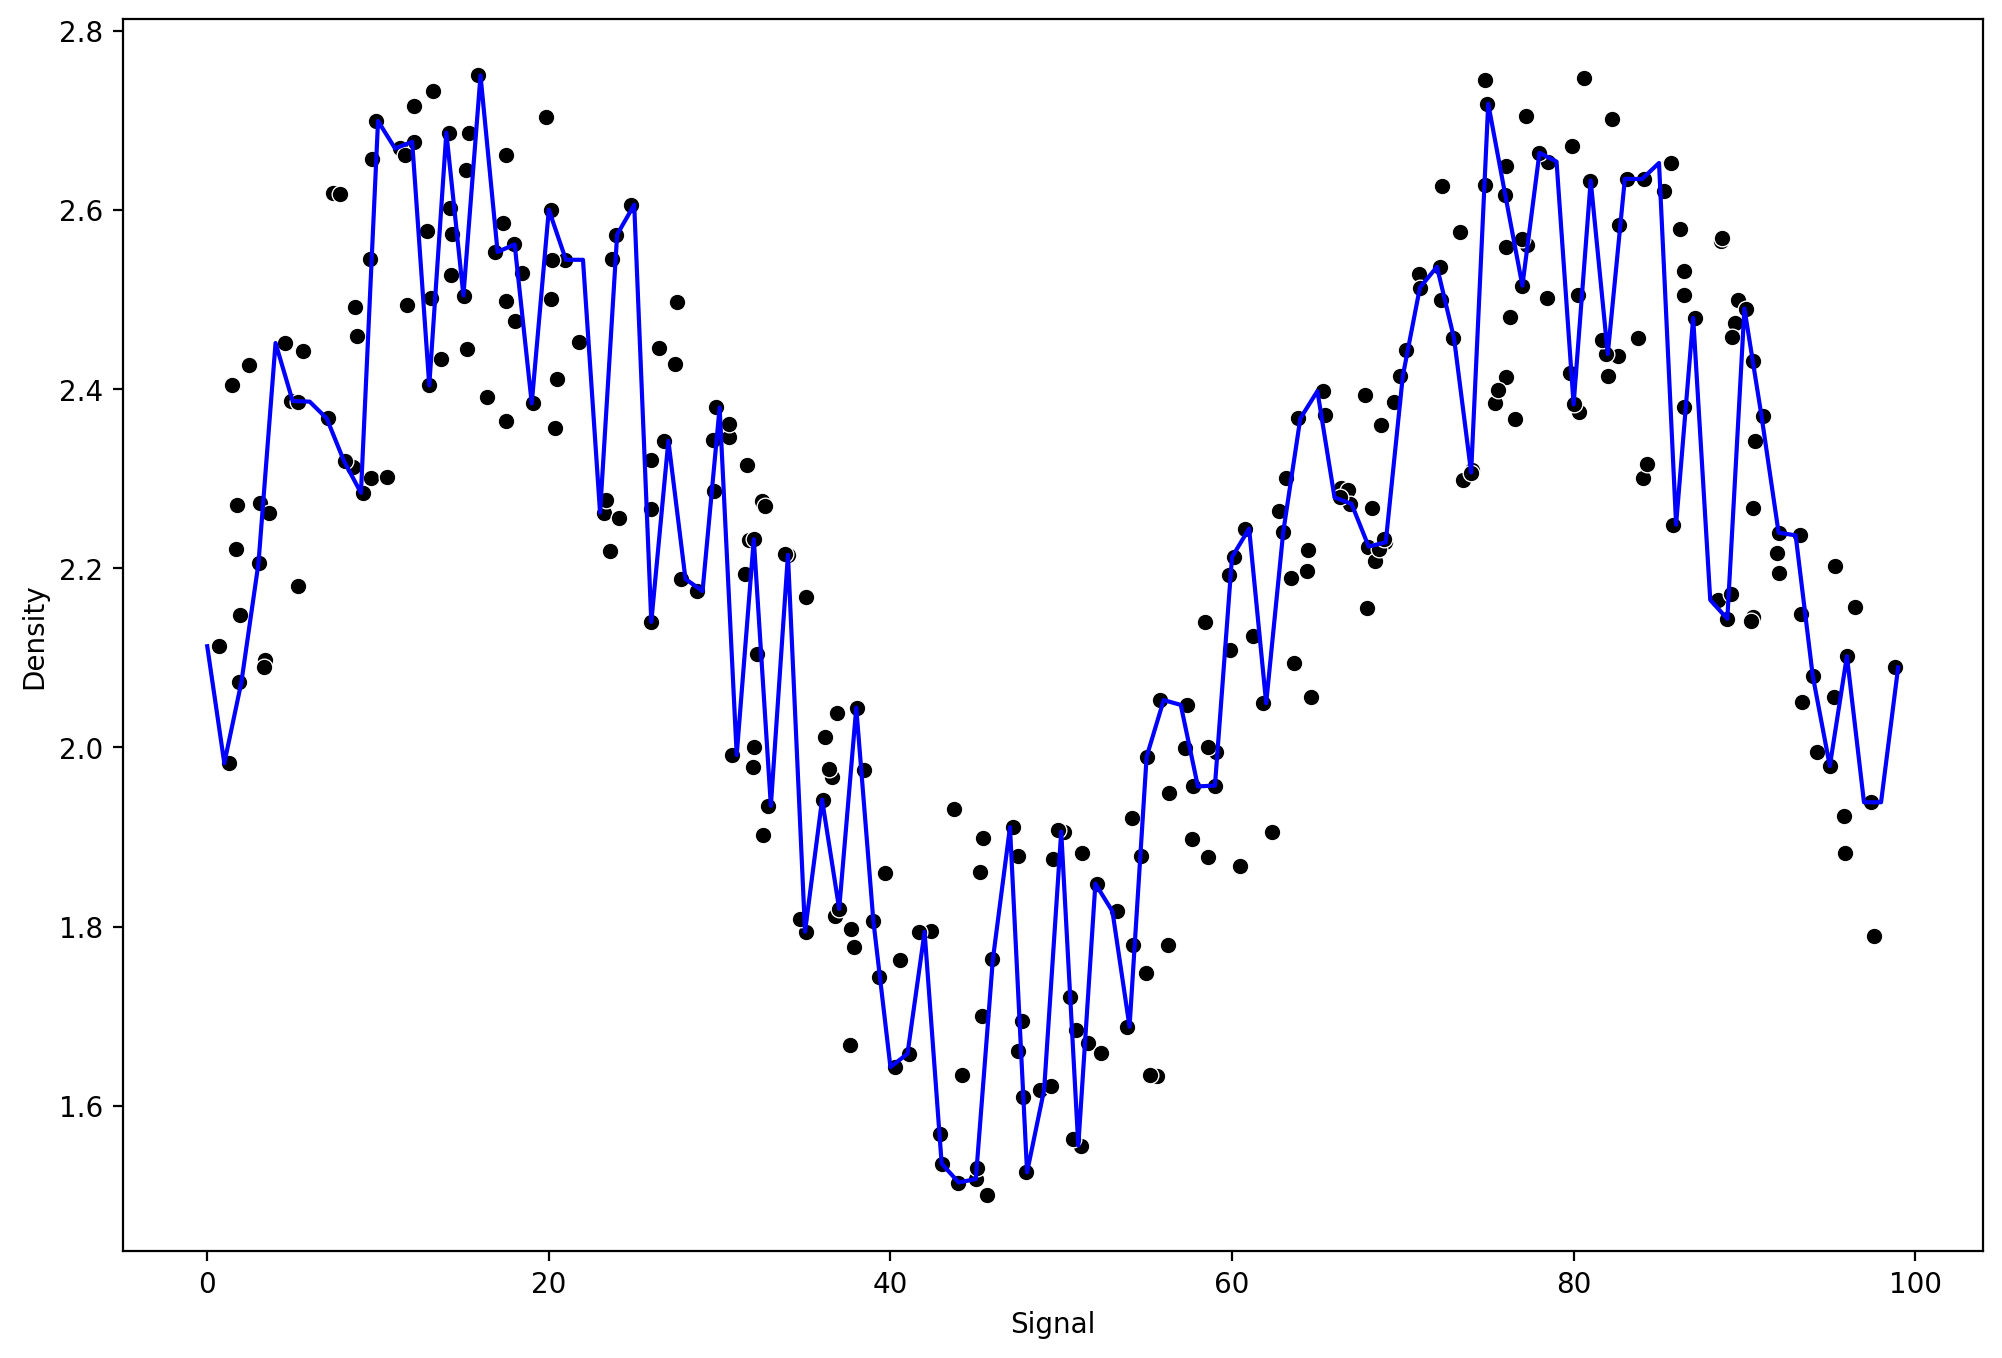

MAE: 0.12198383614100558
RMSE: 0.13730685016923647


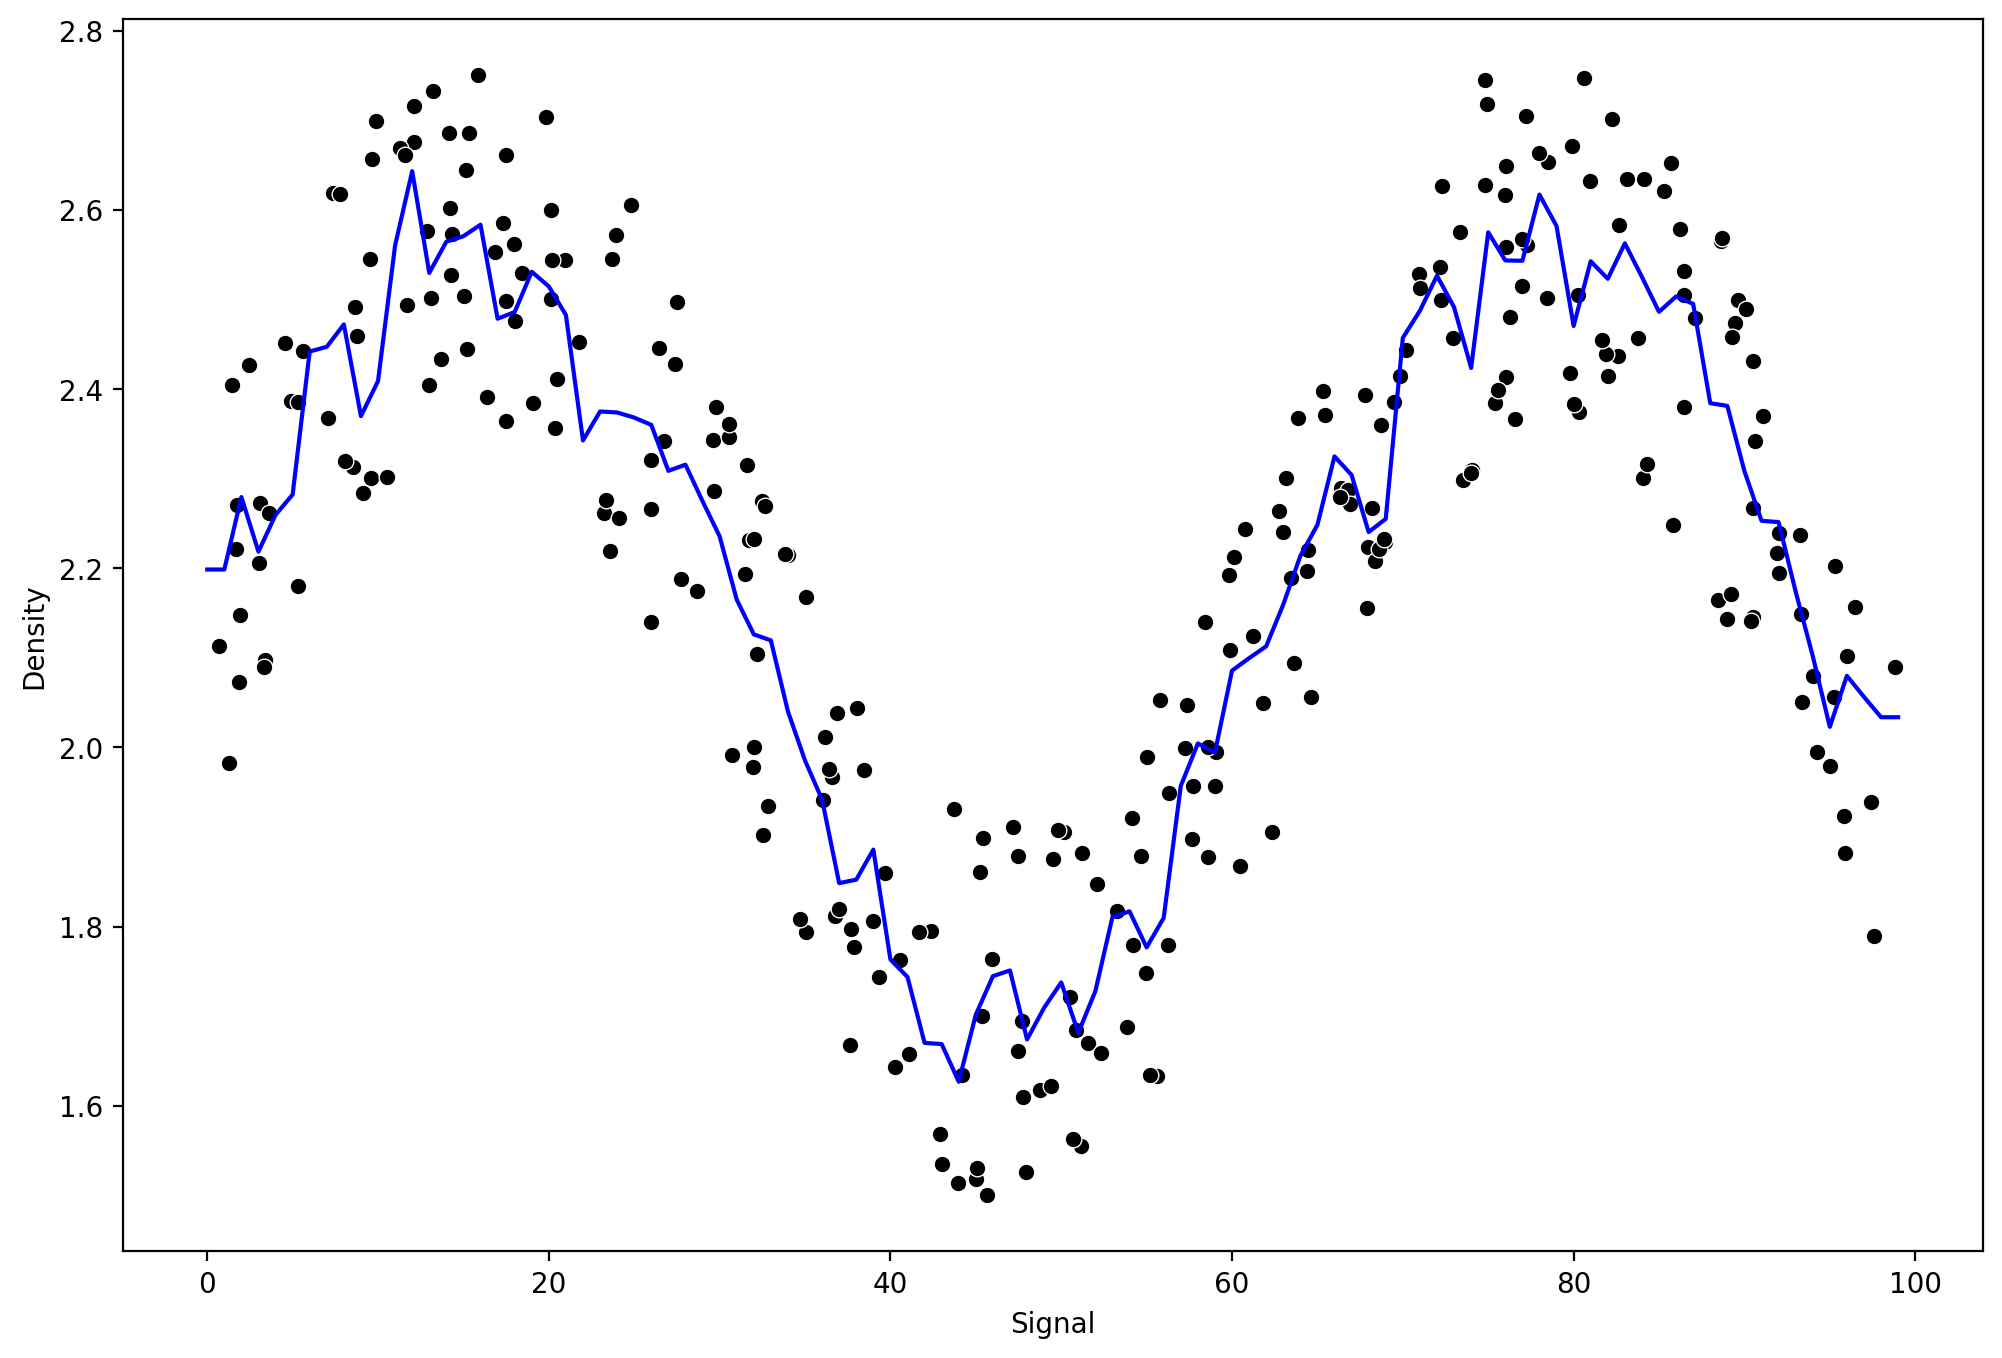

MAE: 0.11635971693292672
RMSE: 0.13277855732740926


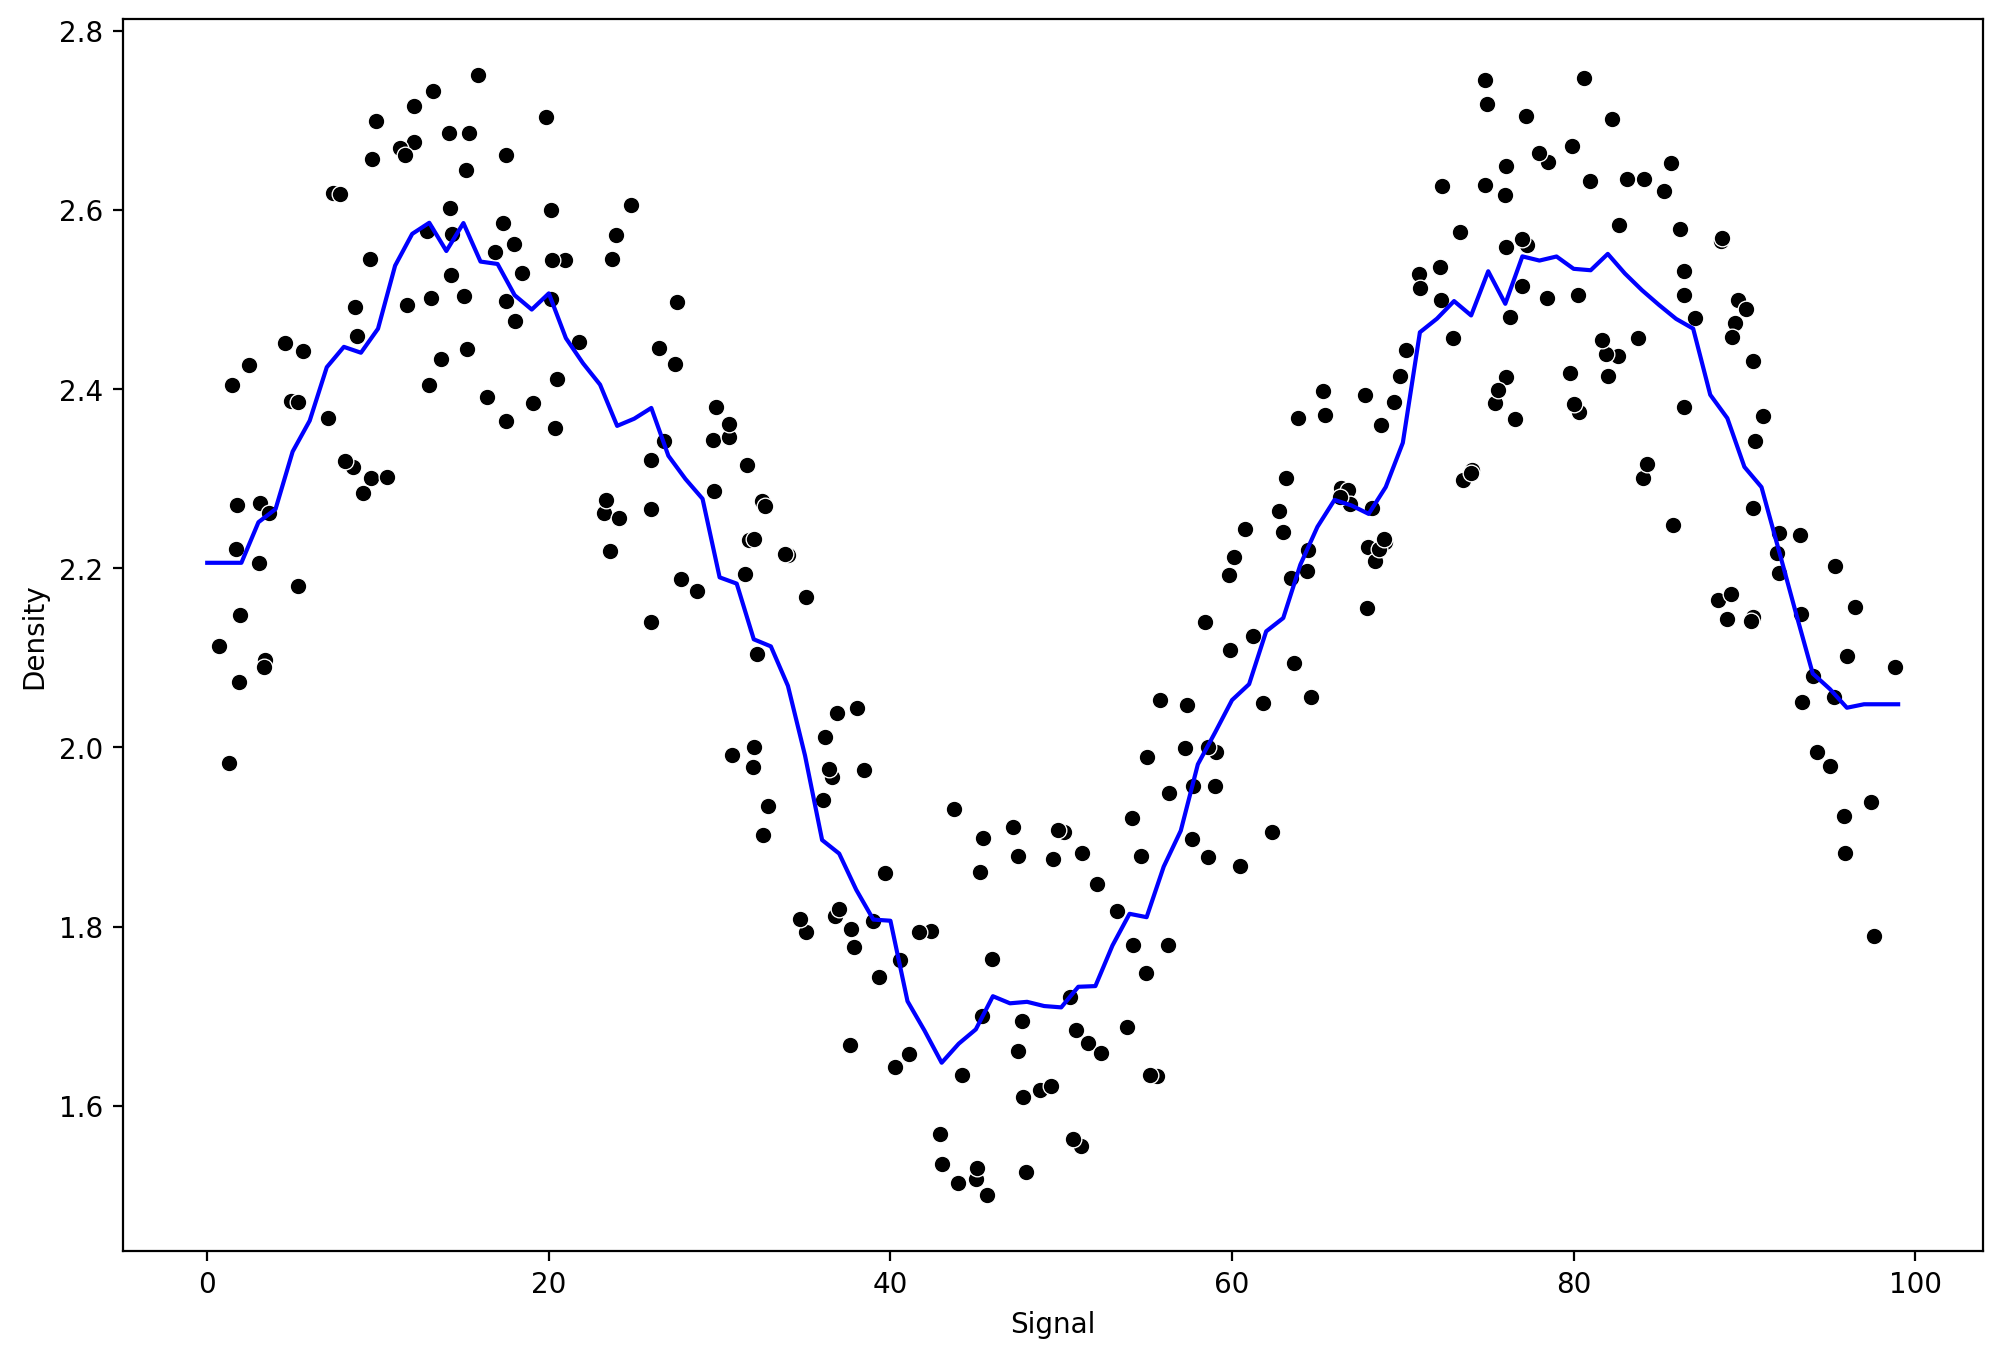

In [96]:
# Напишем цикл для того, чтобы выяснить,
# сколько ближайших соседей лучше взять
k_values = [1, 5, 10]

for n in k_values:

    # Создаем модель
    model = KNeighborsRegressor(n_neighbors=n)
    # Запустим вспомогательную функцию
    run_model(model, X_train, y_train, X_test, y_test)

Мы получаем наборы метрик сначала для k со значениями 1, 5 и 10, а также графики для них.

Для k=1 получился график в виде пилы - он очень сильно отвлекается на шумы в данных. Здесь получилось слишком много дисперсии, но тем не менее, этот график проходит очень близко к большинству точек.

Если же число k увеличивается, то получаются более усреднённые значения, так как в модель добавляется больше смещения. В итоге, такие графики получаются более плавными.

Важно отметить для k=10 - на краях диапазона около 0 и около 100 получаются отрезки прямой линии, поэтому слишком большое количество соседей выбирать не стоит.

---
---
# Регрессия с помощью деревьев решений

In [100]:
from sklearn.tree import DecisionTreeRegressor

Многие параметры, которые были у деревьев решений для задач классификации, также доступны и для задач регрессии. Но так как в данной задаче всего один признак, различные параметры нам не особо помогут.

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


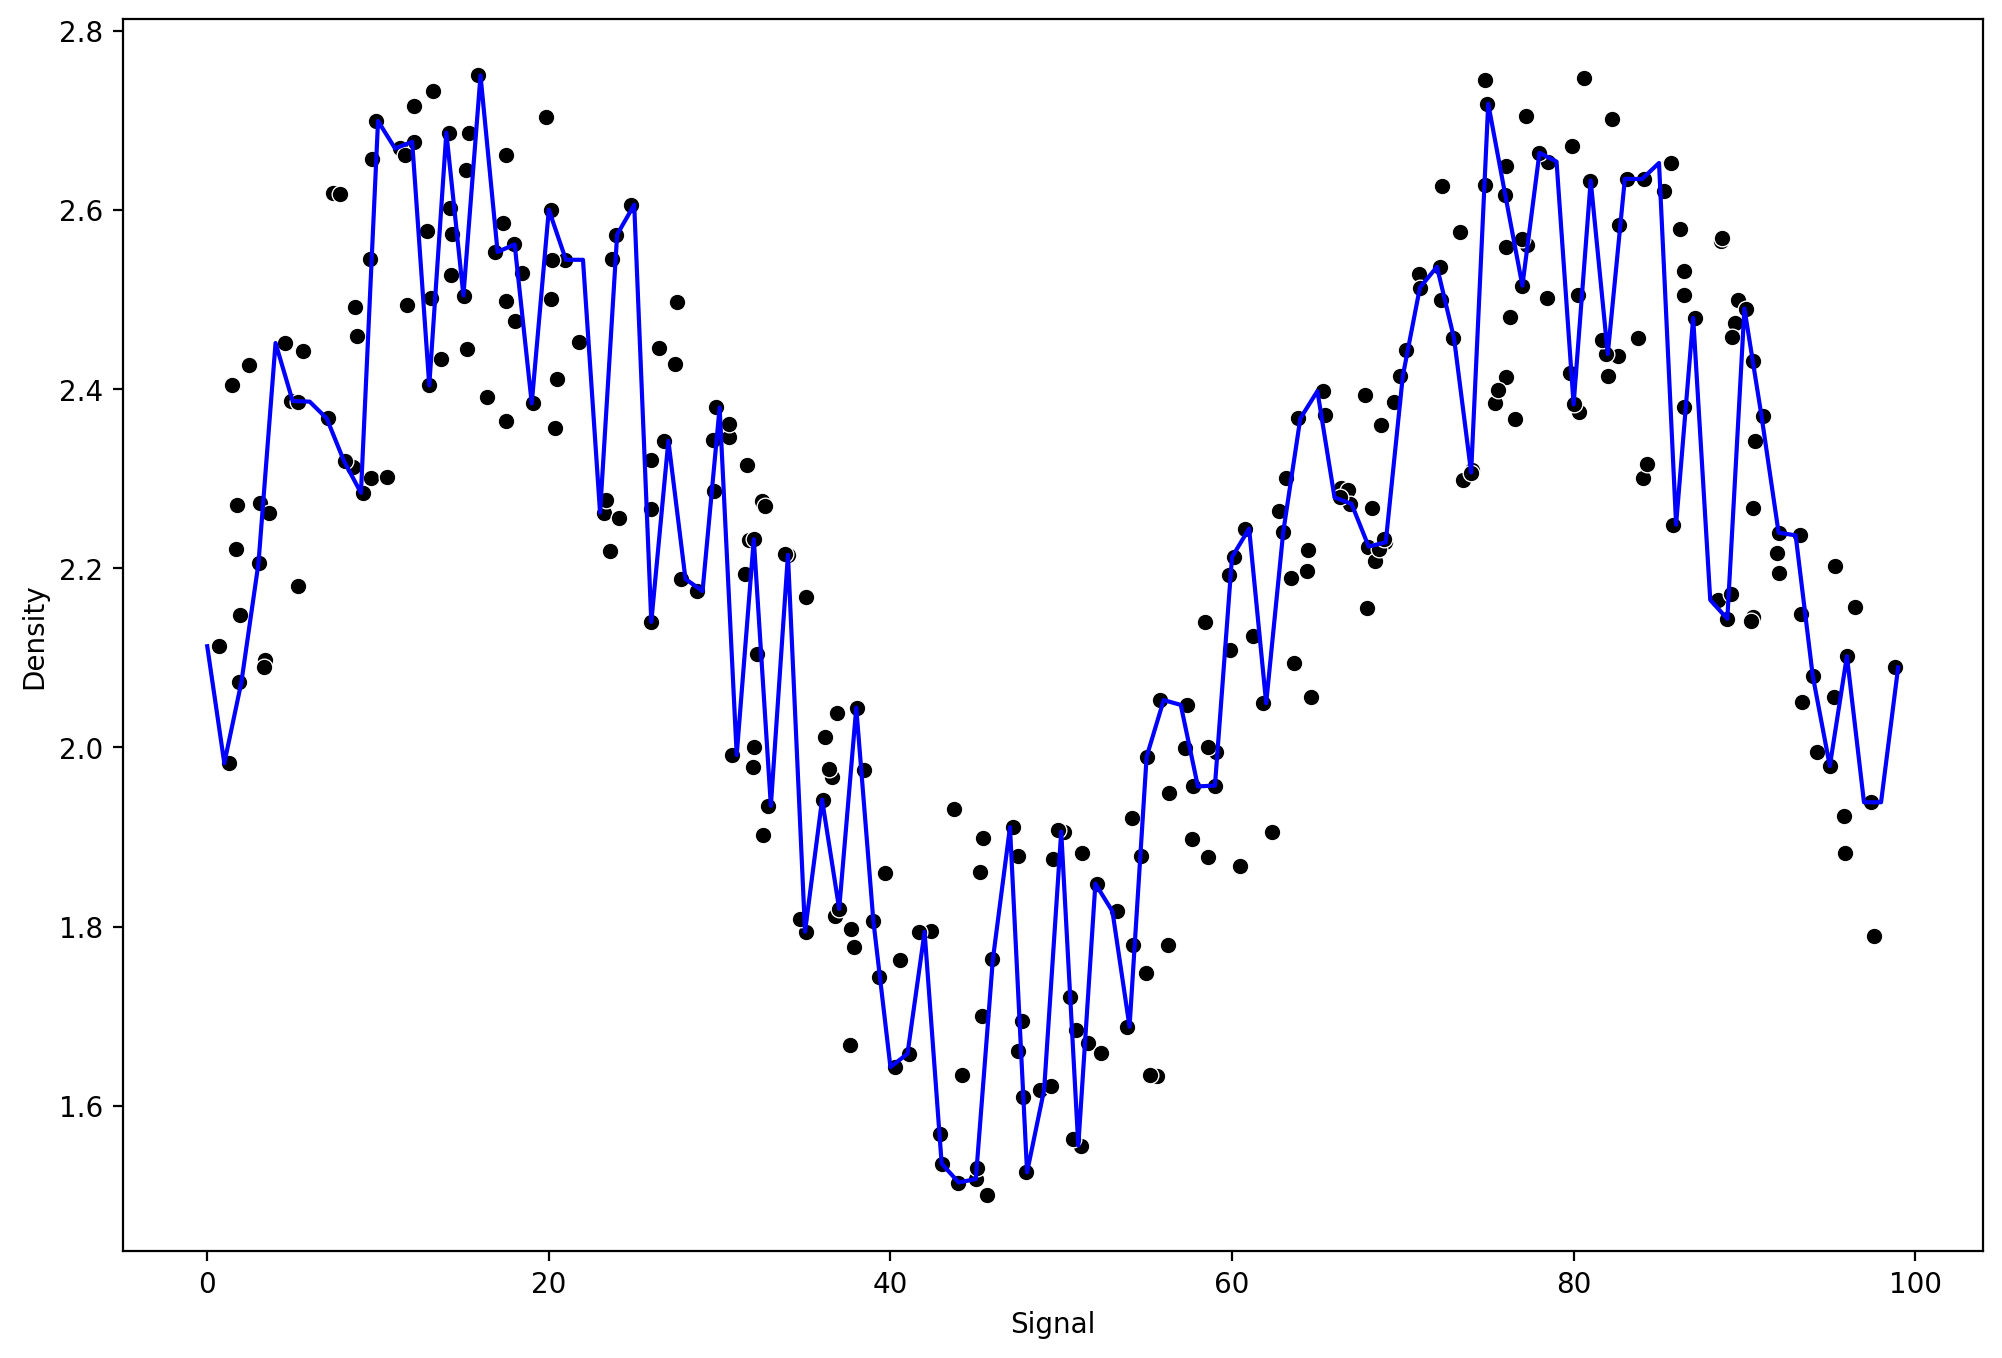

In [104]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

Одно дерево решений возвращает график в виде пилы, т.е. наша модель сильно отвлекается на шумы в данных.

---
---
# Регрессия с помощью метода опорных векторов

In [110]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
              'gamma':['auto', 'scale']}
svr = SVR()
grid = GridSearchCV(svr, param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


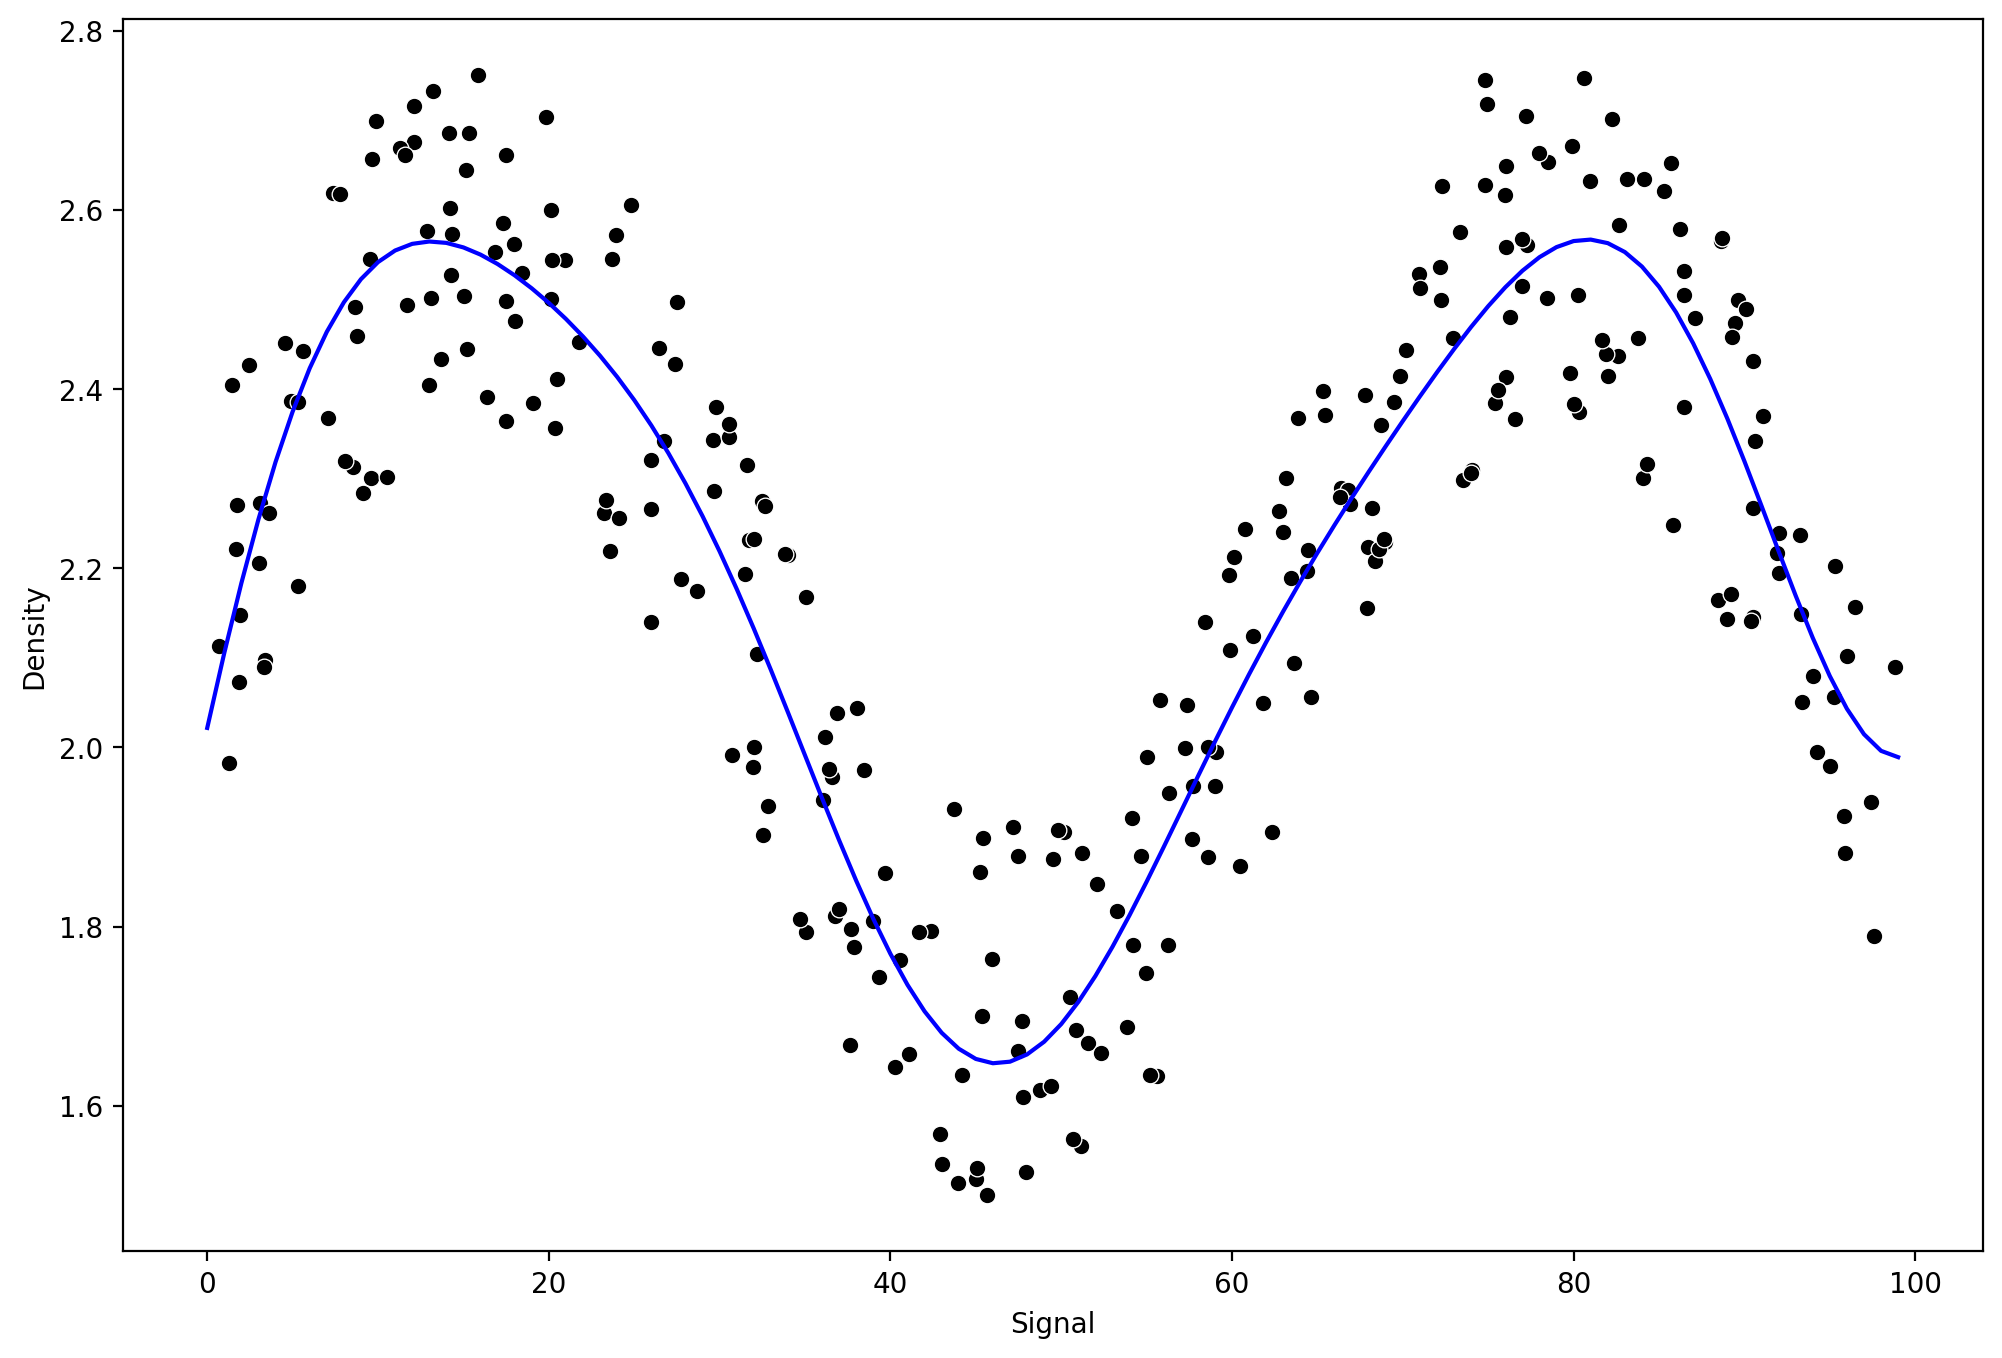

In [114]:
run_model(grid, X_train, y_train, X_test, y_test)

Получился хороший график, но при желании можно уточнить параметры *C* и *gamma*, чтобы повлиять на то, насколько этот график будет плавным.

---
---
# Регрессия с помощью метода случайных лесов

In [118]:
from sklearn.ensemble import RandomForestRegressor

MAE: 0.10746996203708652
RMSE: 0.13597528950084542


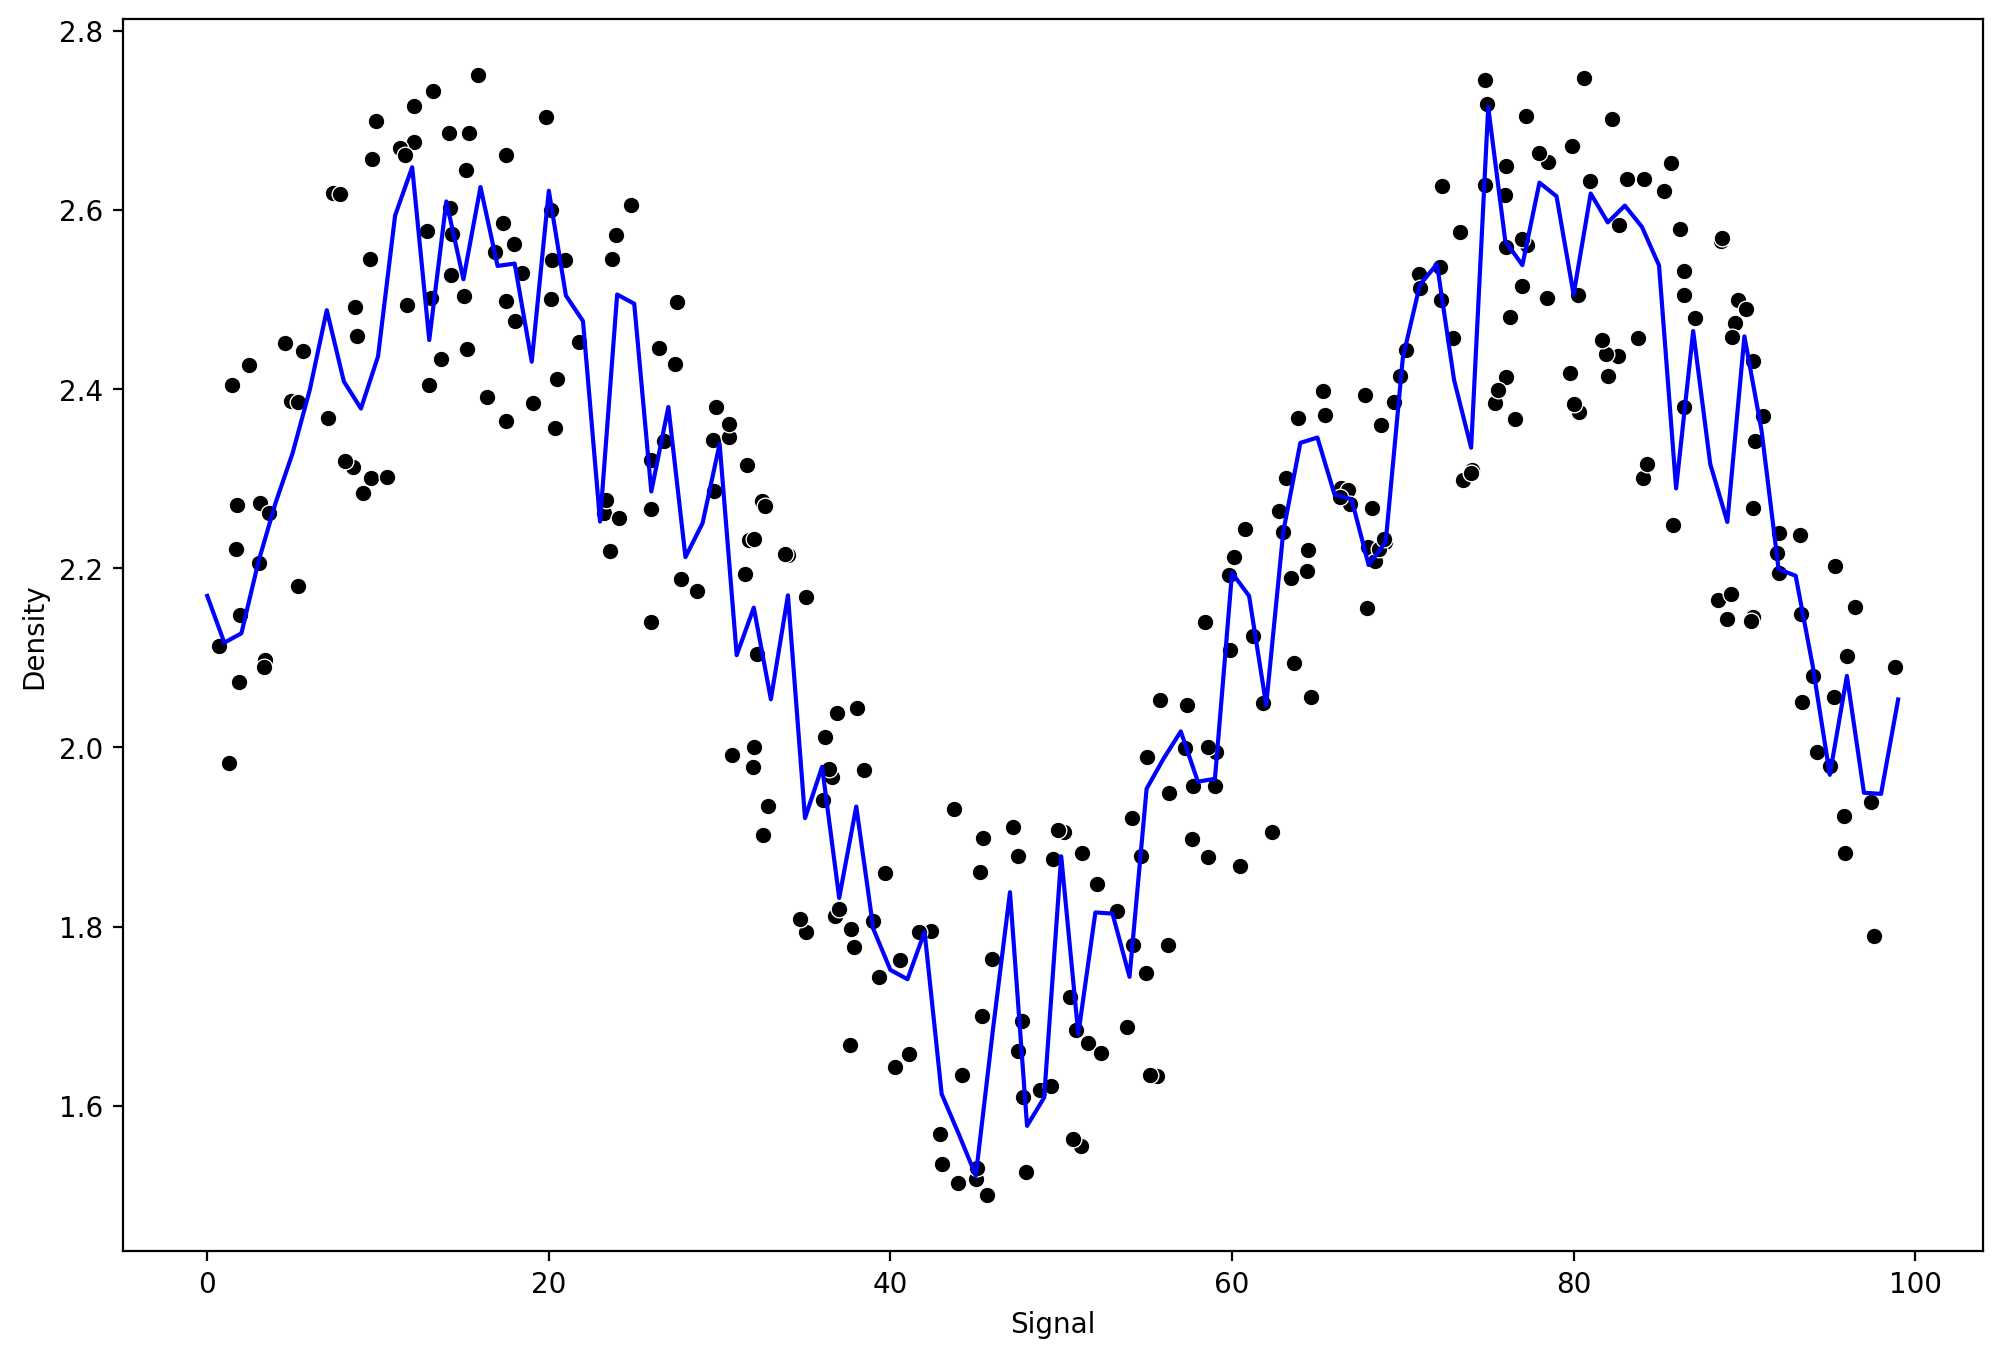

In [120]:
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr, X_train, y_train, X_test, y_test)

Здесь мы также увидим такой же график как и для одного дерева решений. Модель слишком чувствительна к шумам в данных, но в целом, старается как можно лучше проходить рядом со всеми точками. Однако, всё очень сильно зависит от конкретных данных, а также от количества признаков.

---
---
# Регрессия с помощью метода расширяемых деревьев

In [124]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


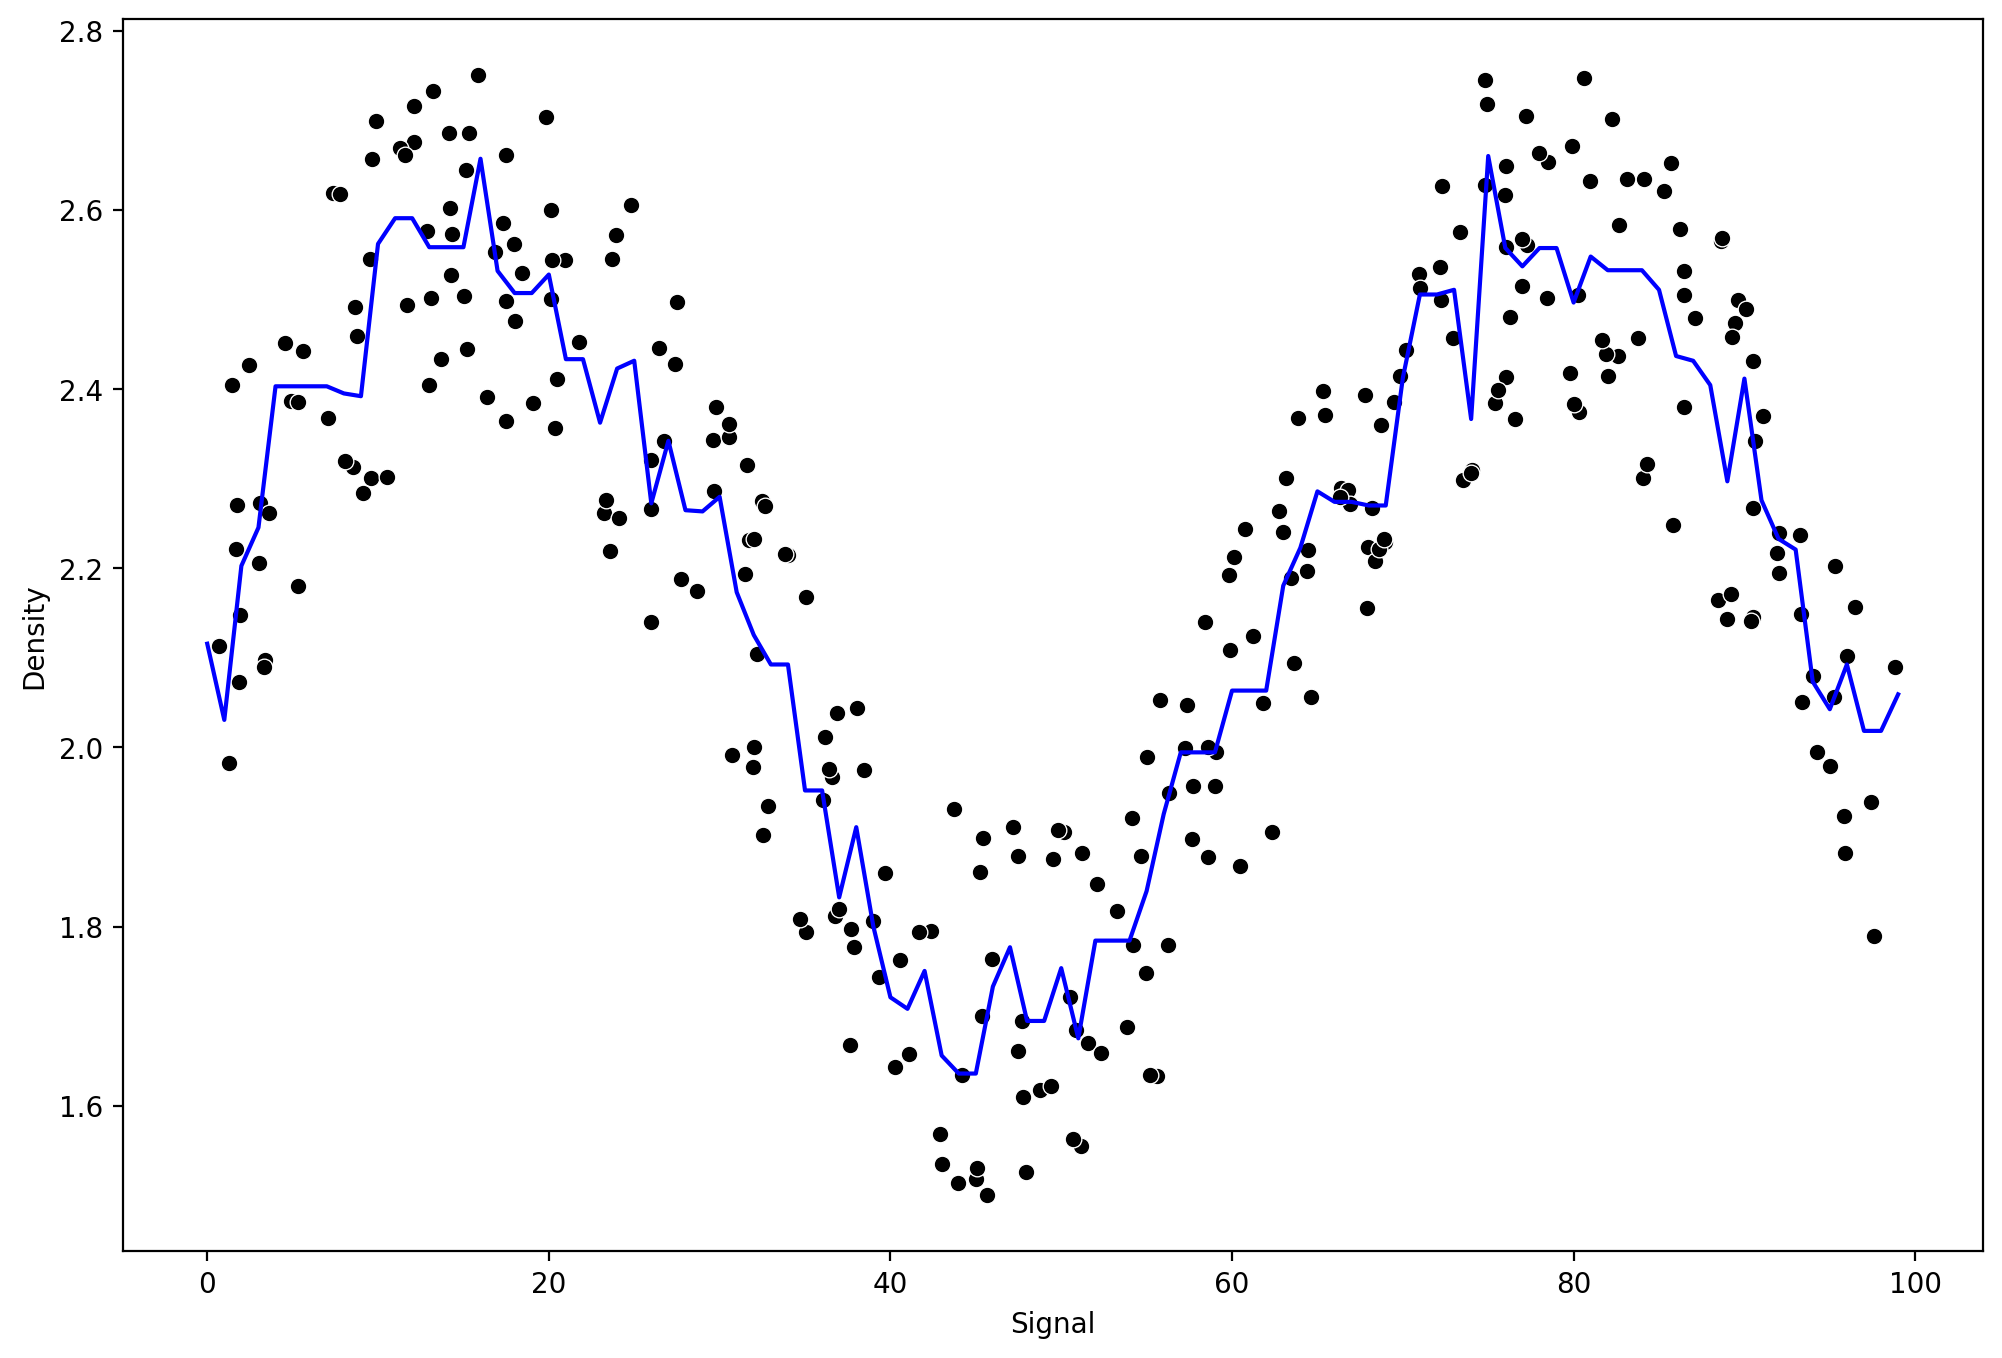

In [126]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

График является зубчатым, в целом похож на графики для деревьев решений и случайных лесов. Но в целом, график достаточно хорошо проходит вдоль общего тренда в точках, причём этот график более плавный, чем график для случайного леса. Получается, что в данной конкретной задаче градиентный бустинг работает лучше, чем случайный лес.

---
---
# Регрессия с помощью AdaBoostRegressor

MAE: 0.12107570137472831
RMSE: 0.14089219666631092


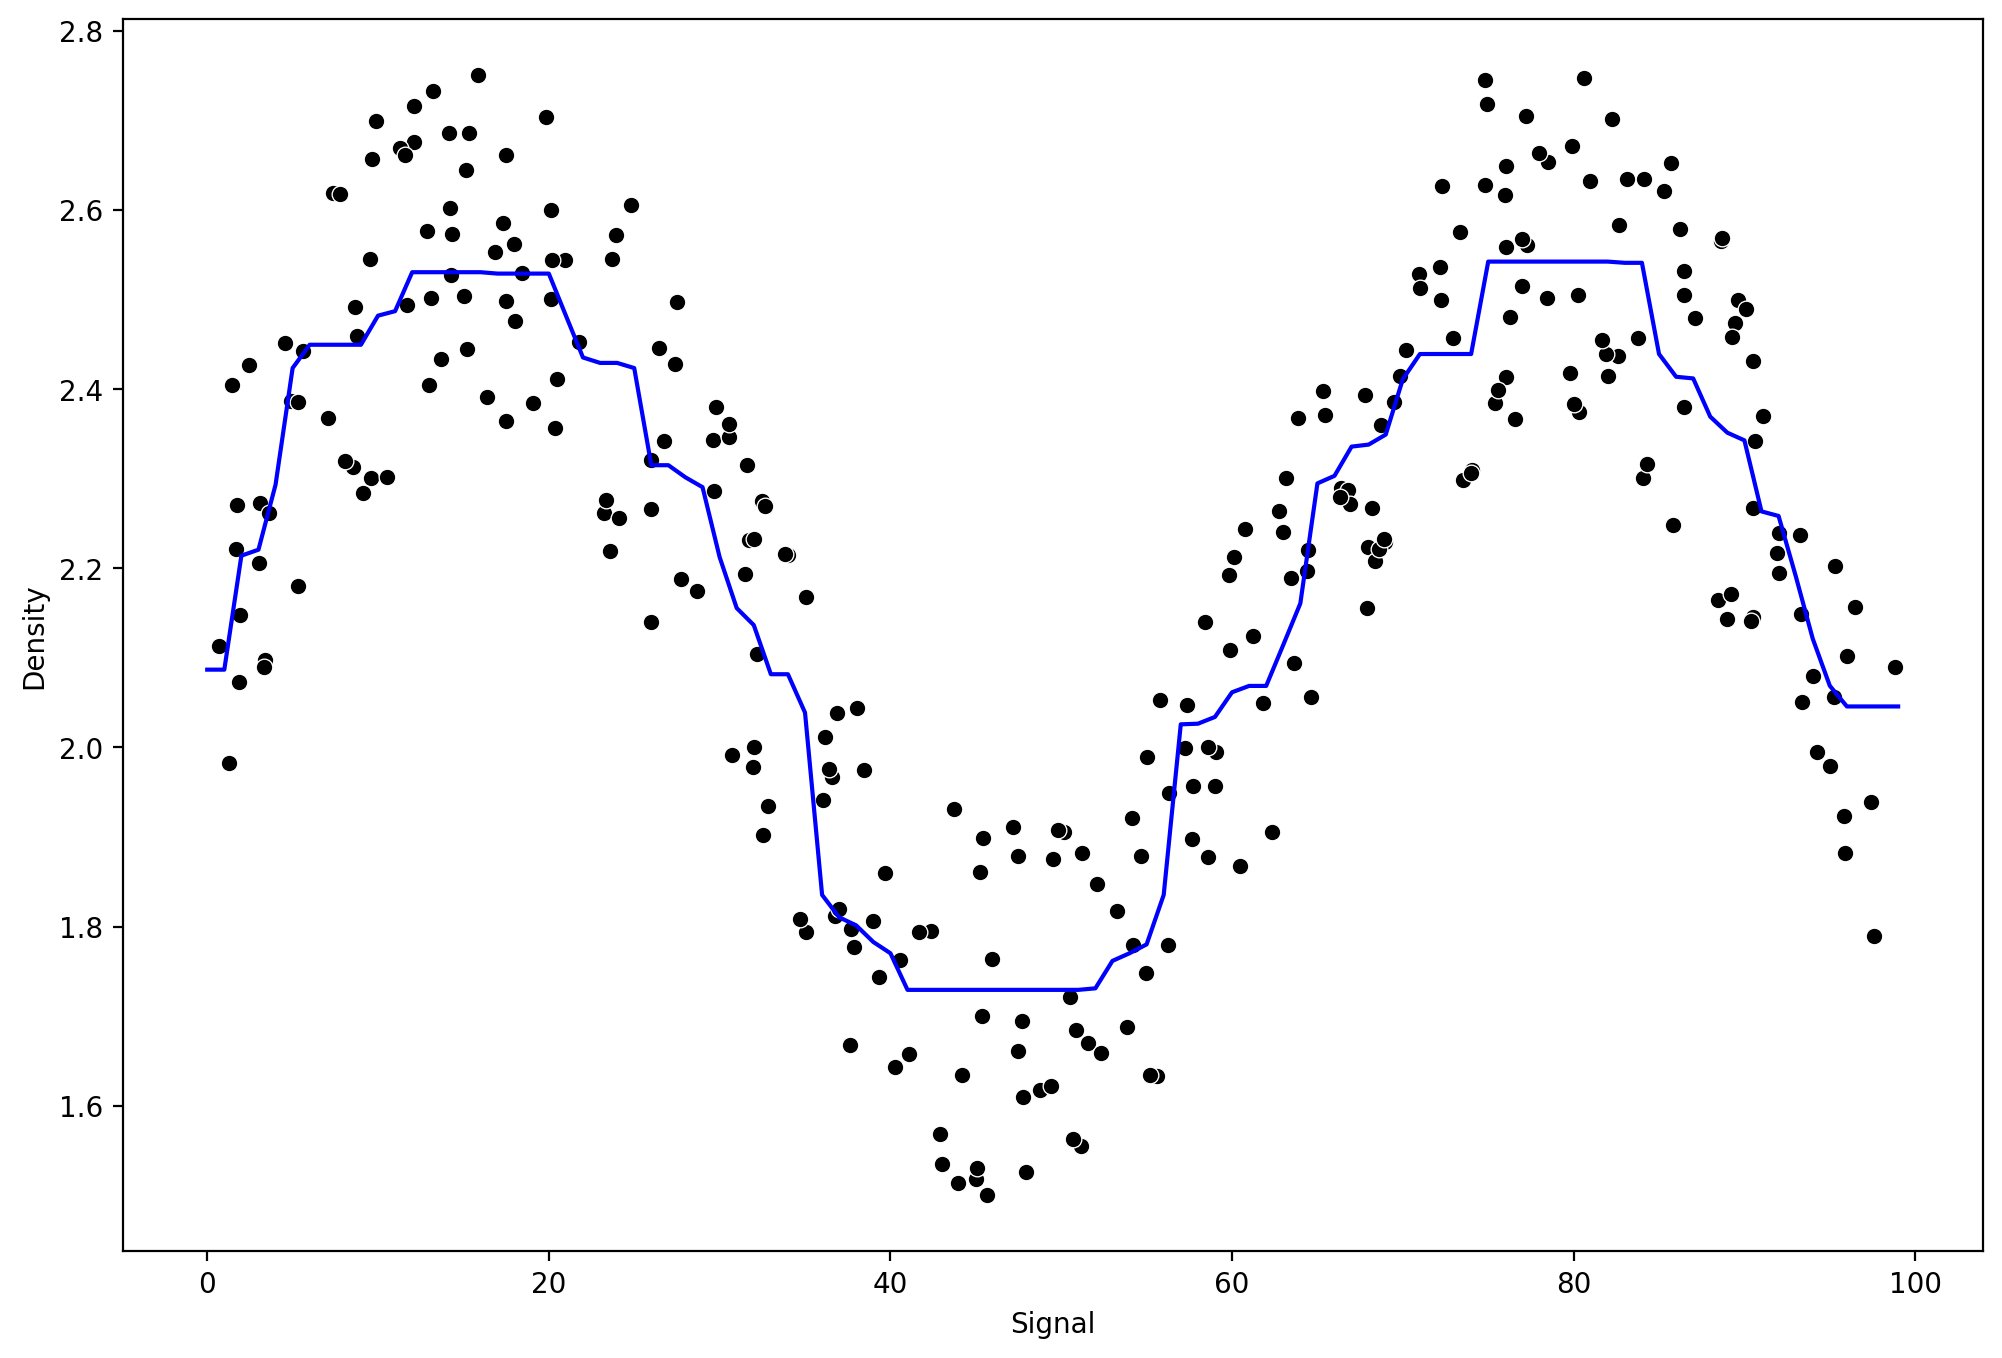

In [130]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)

Здесь также видим похожий график, причём он в меньшей степени учитывает слишком высокие и слишком низкие точки на этом графике.

---